# SMAI ASSIGNMENT 2 - Problem 3
## Srujana Vanka - 2020102005


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from PIL import Image
from tabulate import tabulate 
from scipy.cluster.hierarchy import linkage, dendrogram

# 3.1 Hierarchical Clustering: Linkages and Features

## Customer dataset

In [23]:
# Loading the dataset
data_path = '/home/sruj/Downloads/SMAI-Dataset-hc-dataset/new_customers.csv'
customer_dataset = pd.read_csv(data_path)
customer_dataset.head(10)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [29]:
customer_dataset.shape

(200, 5)

In [24]:
# Annual income and spending score in a numpy array 
X = customer_dataset.iloc[:,[2,3,4]].values
X

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

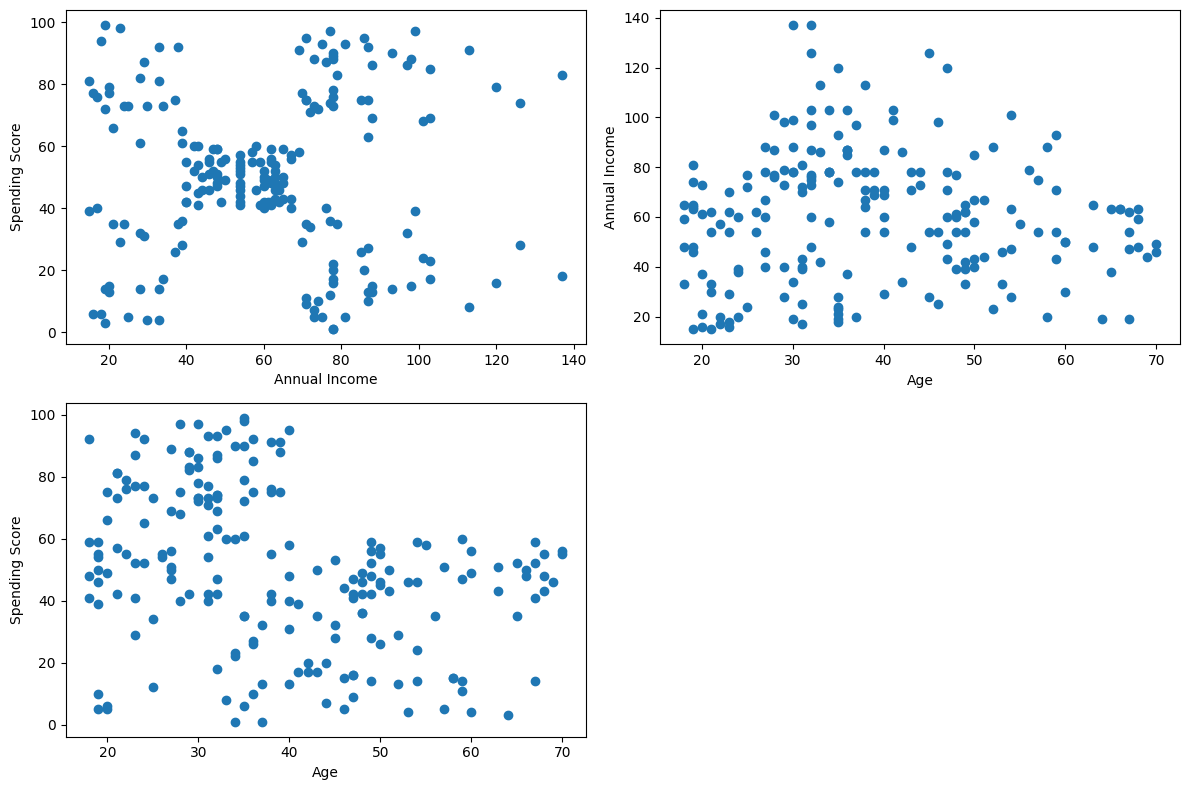

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Annual Income vs. Spending Score
axes[0, 0].scatter(X[:, 1], X[:, 2])
axes[0, 0].set_xlabel("Annual Income")
axes[0, 0].set_ylabel("Spending Score")

# Age vs. Annual Income
axes[0, 1].scatter(X[:, 0], X[:, 1])
axes[0, 1].set_xlabel("Age")
axes[0, 1].set_ylabel("Annual Income")

# Age vs. Spending Score
axes[1, 0].scatter(X[:, 0], X[:, 2])
axes[1, 0].set_xlabel("Age")
axes[1, 0].set_ylabel("Spending Score")

# Hide 4th plot
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

### Perform hierarchical clustering on the dataset and obtain the linkage matrix. Vary the linkages and features used and state your observations. Plot the dendogram using the linkage matrix.

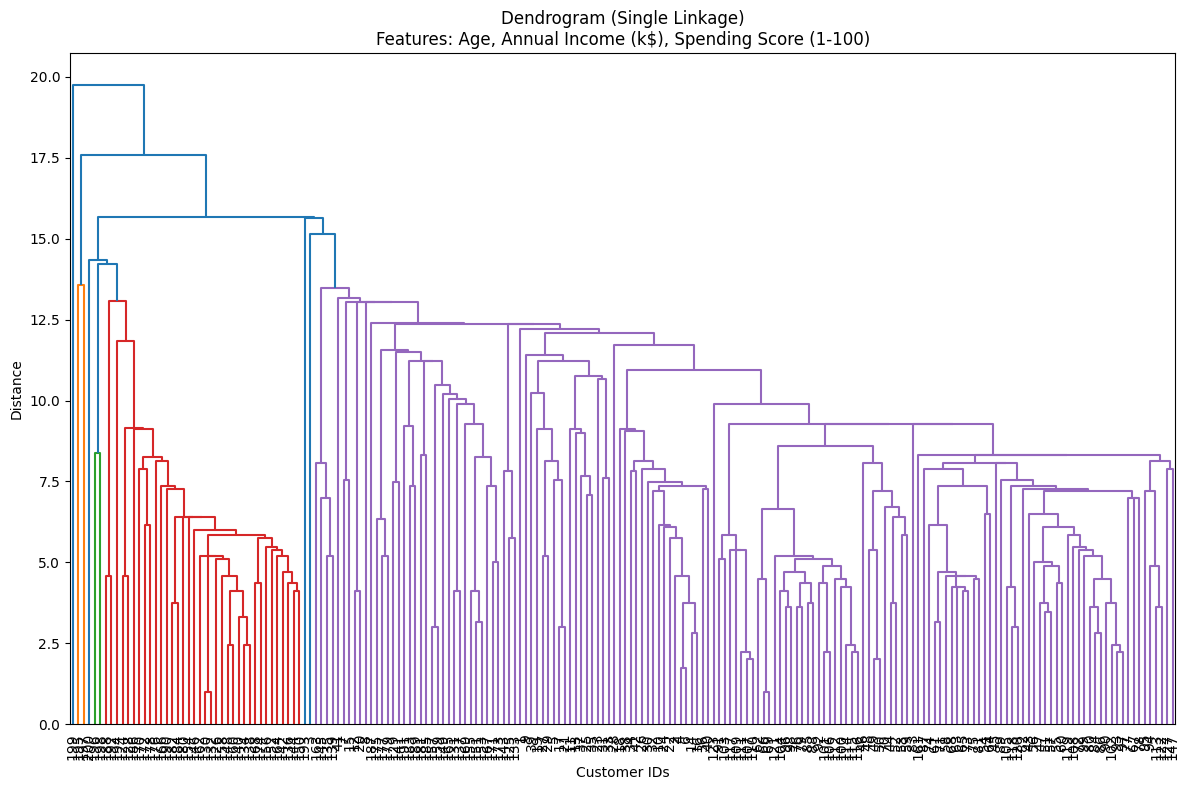

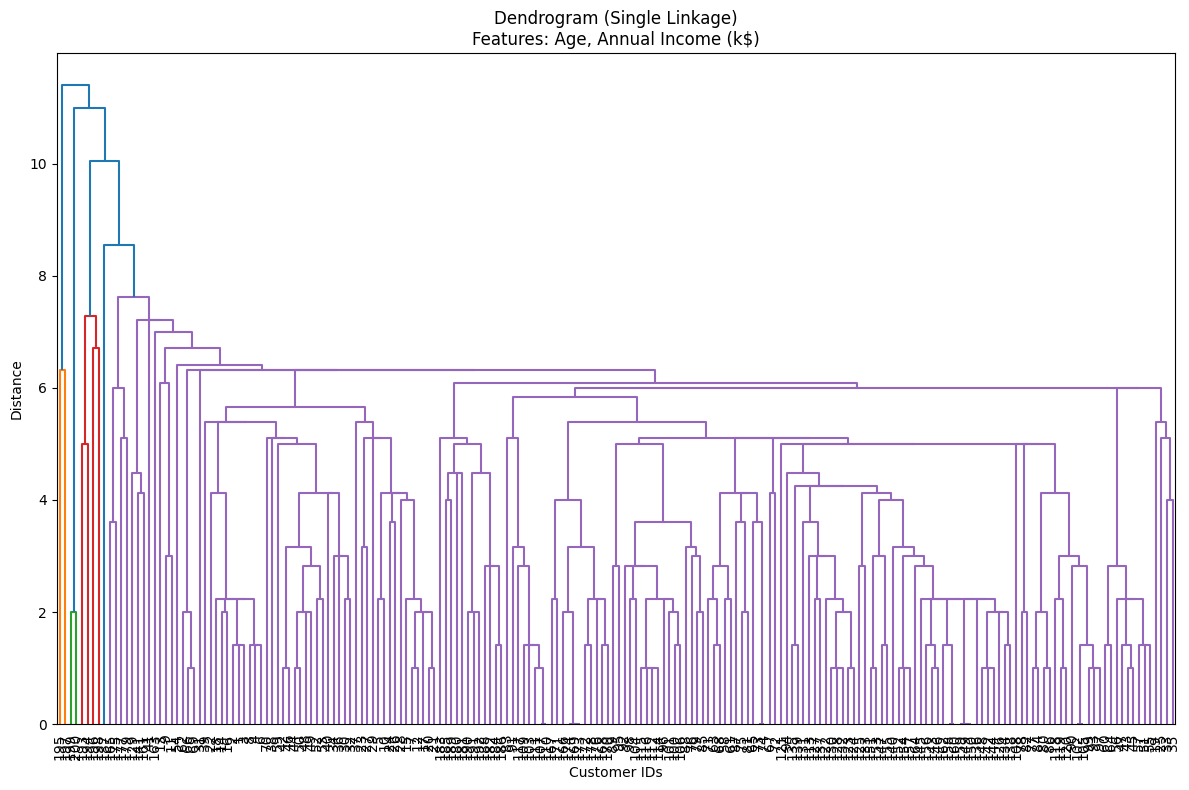

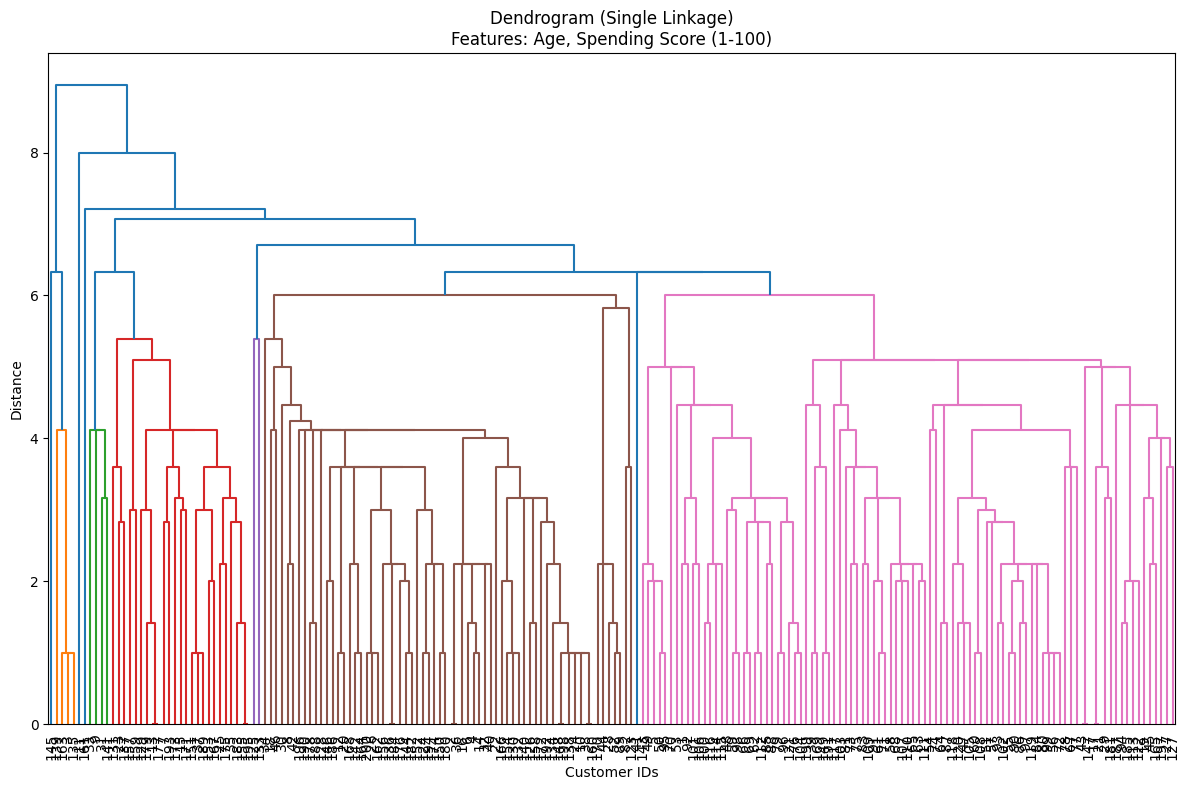

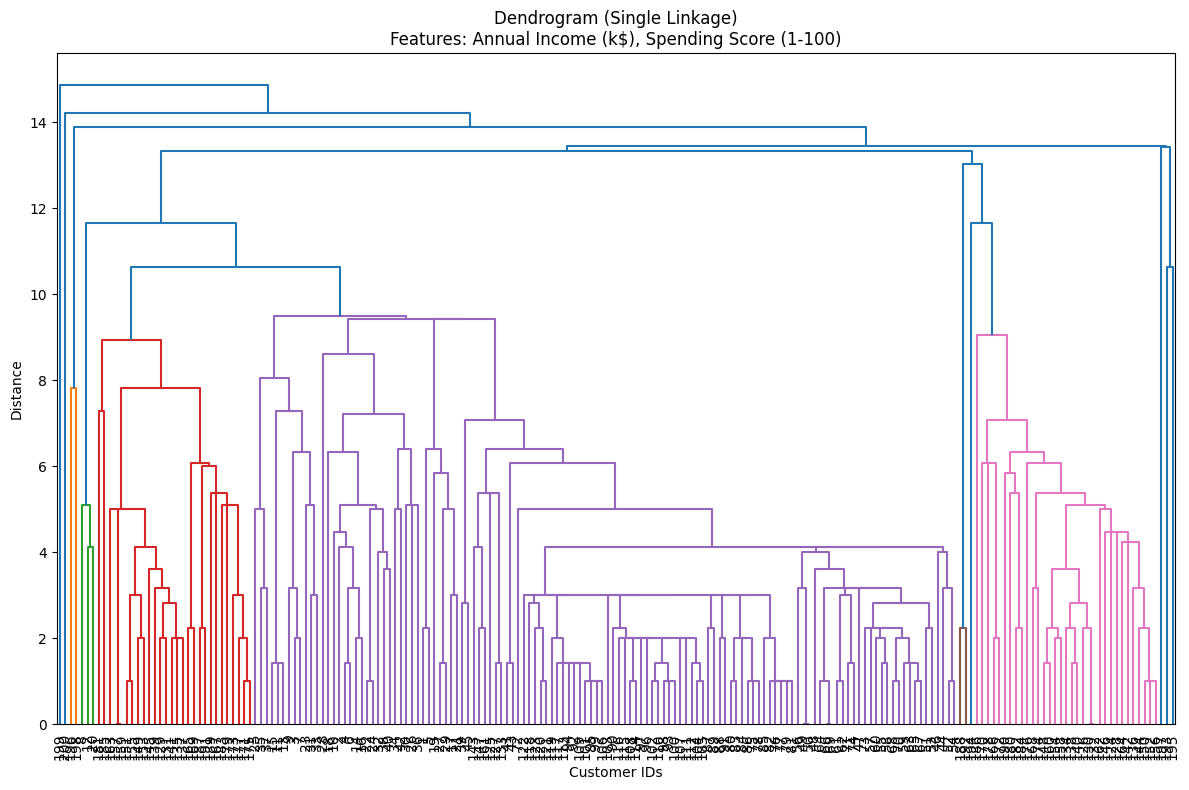

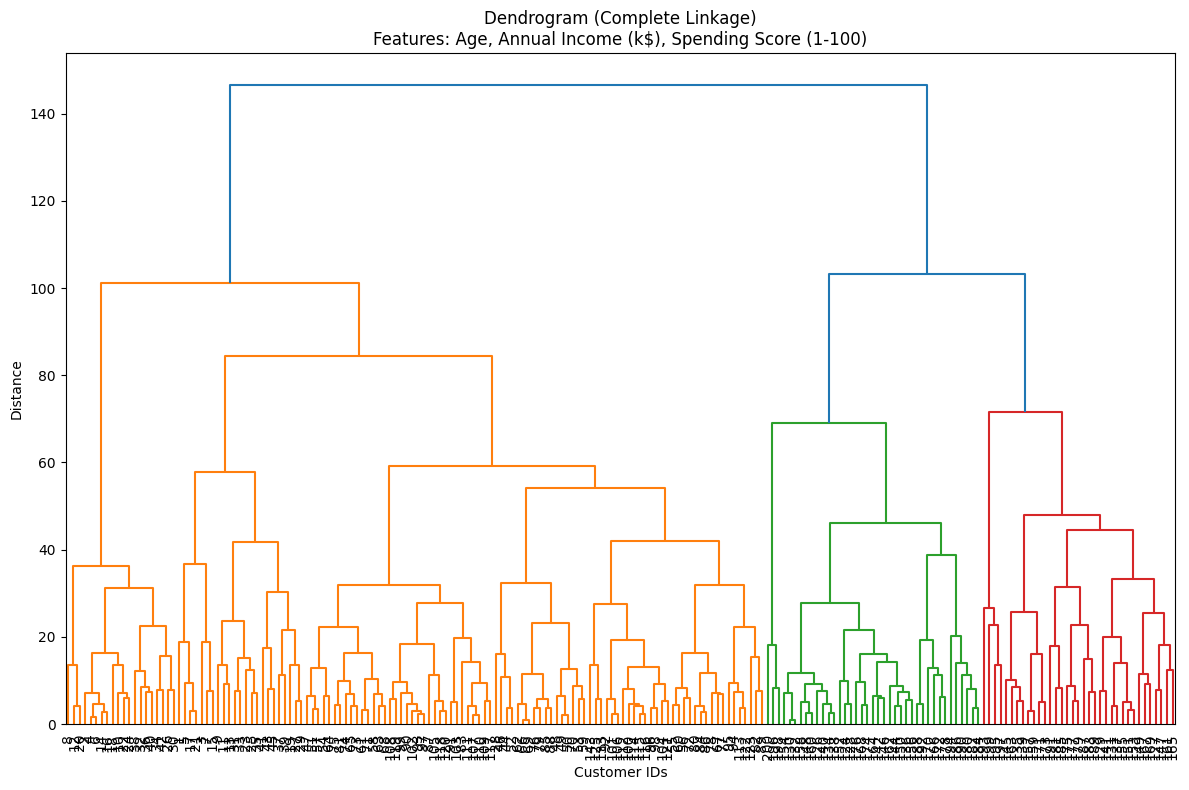

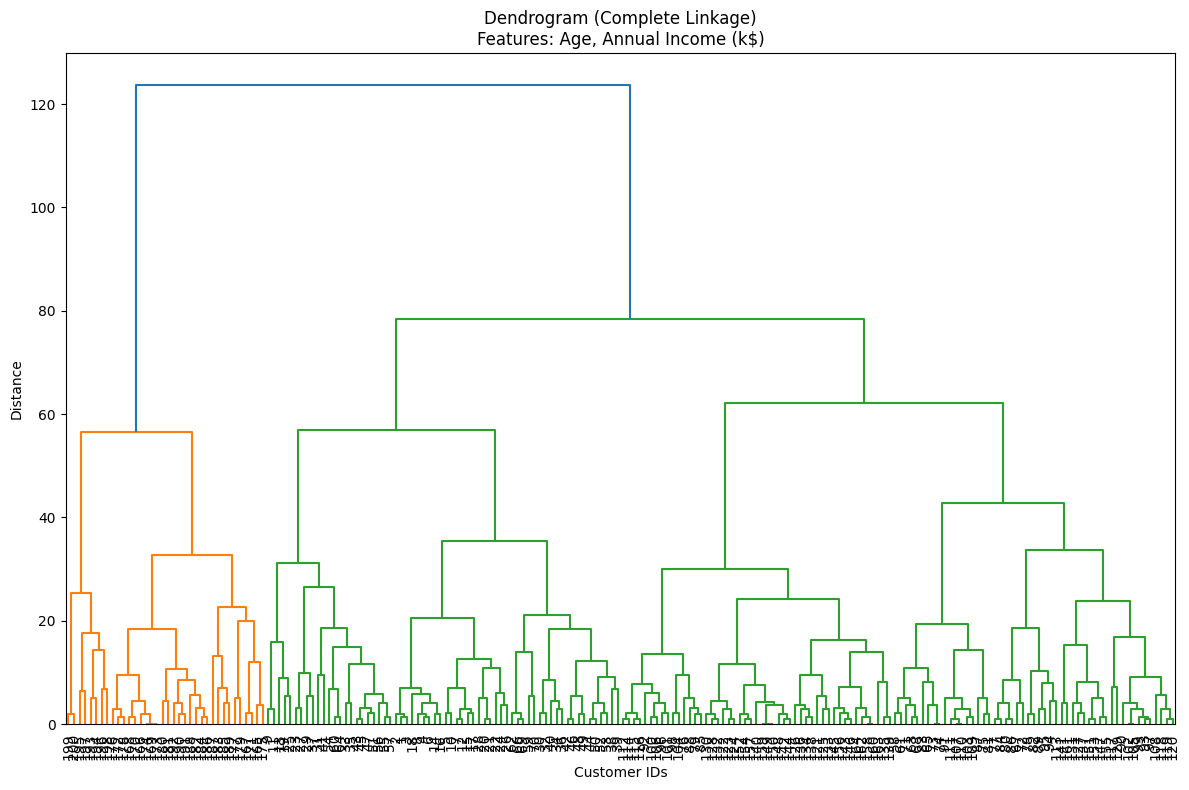

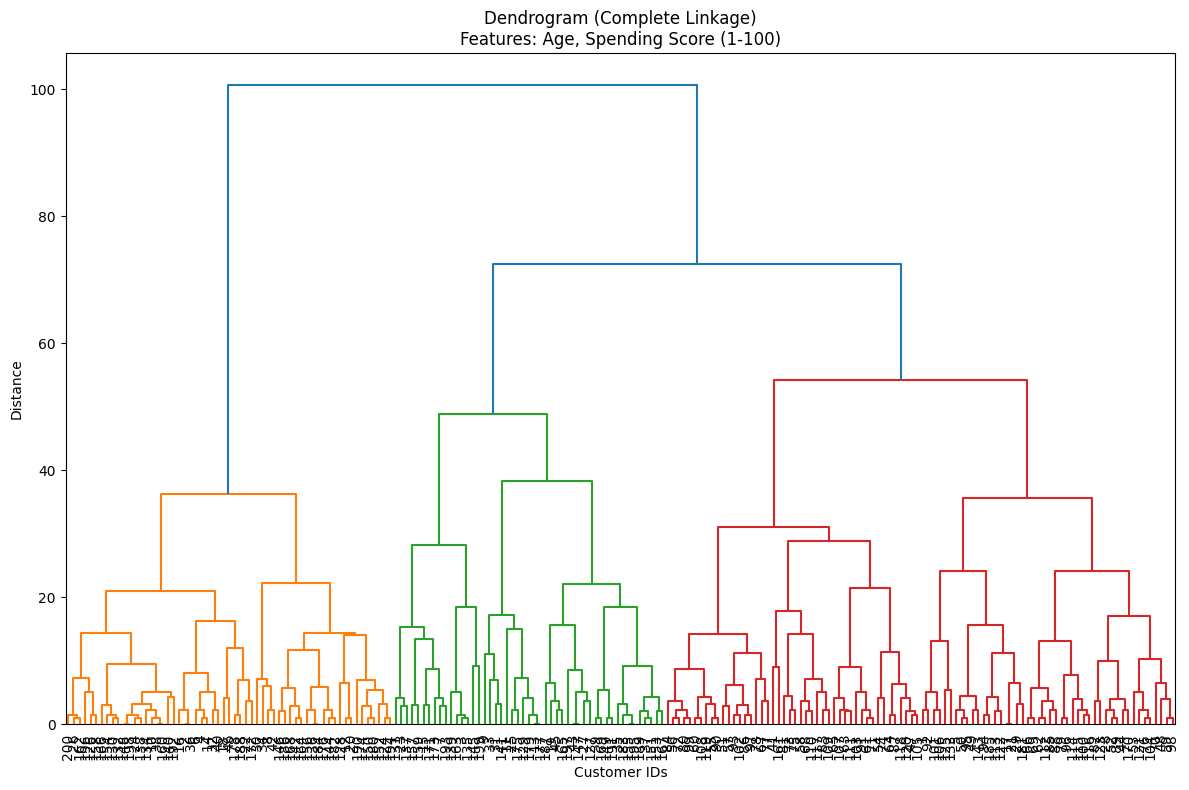

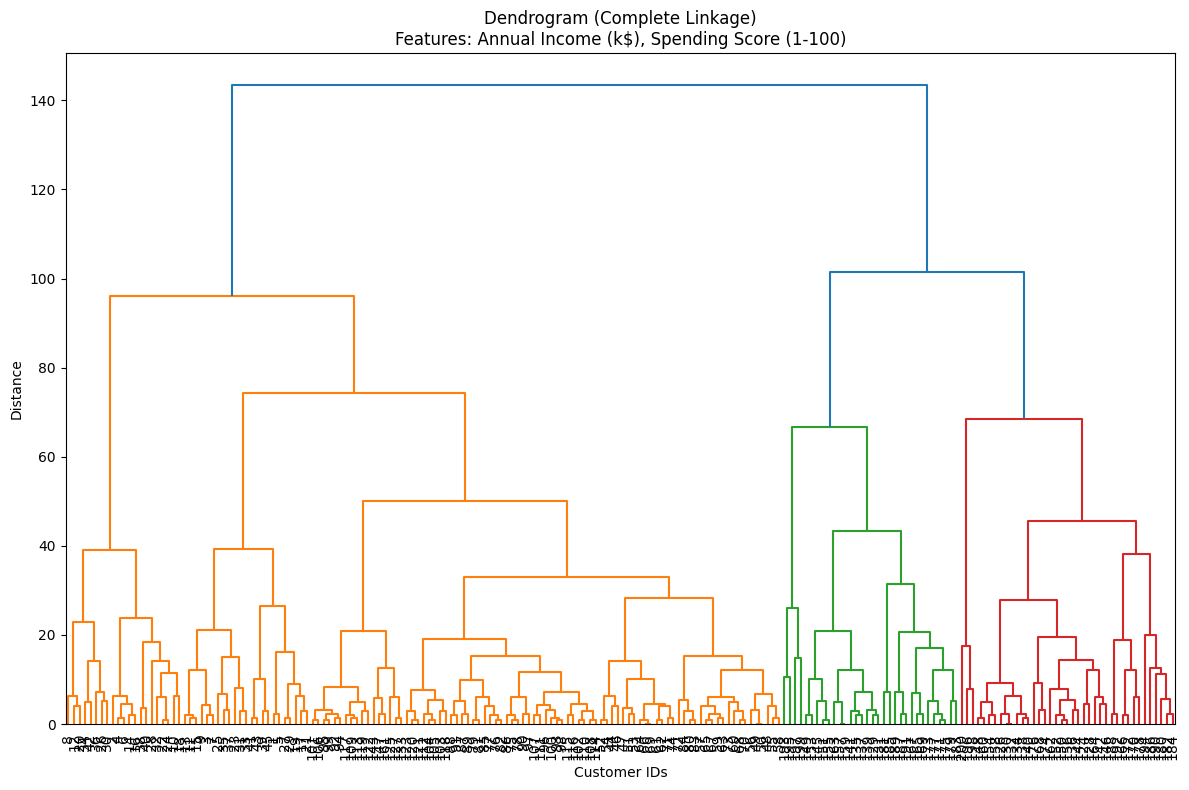

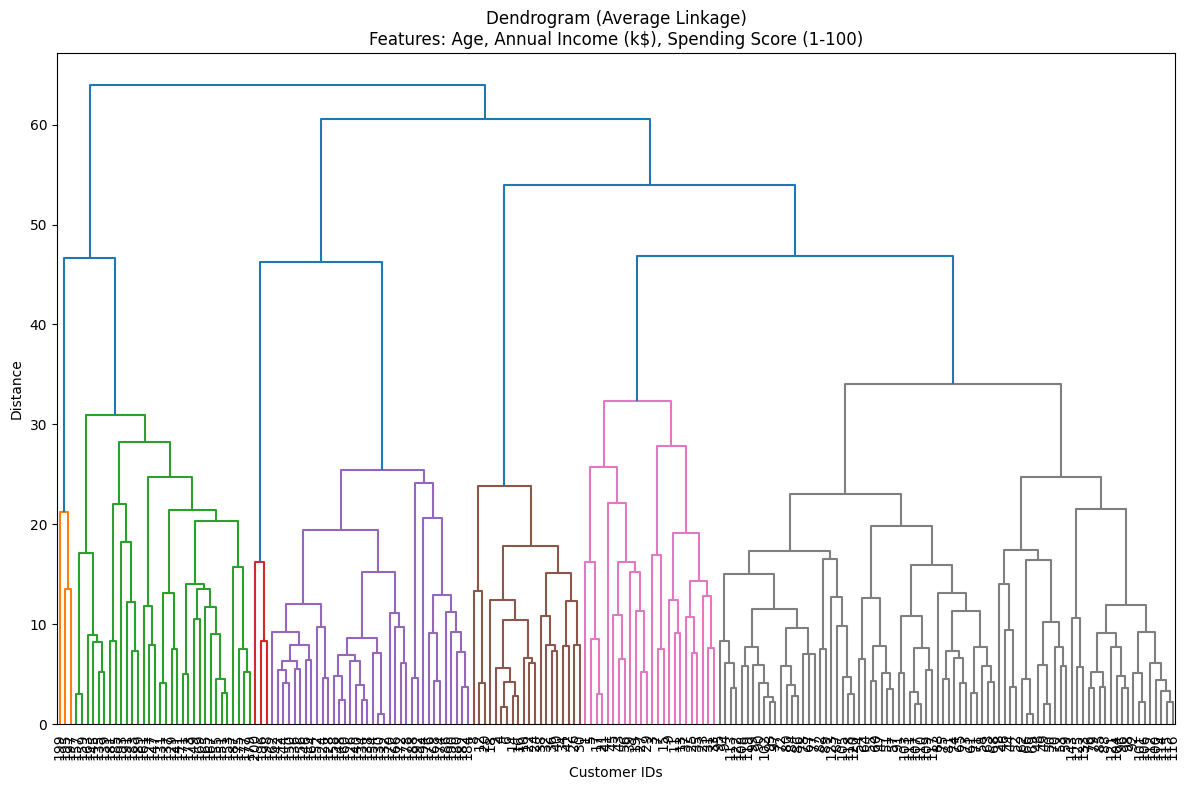

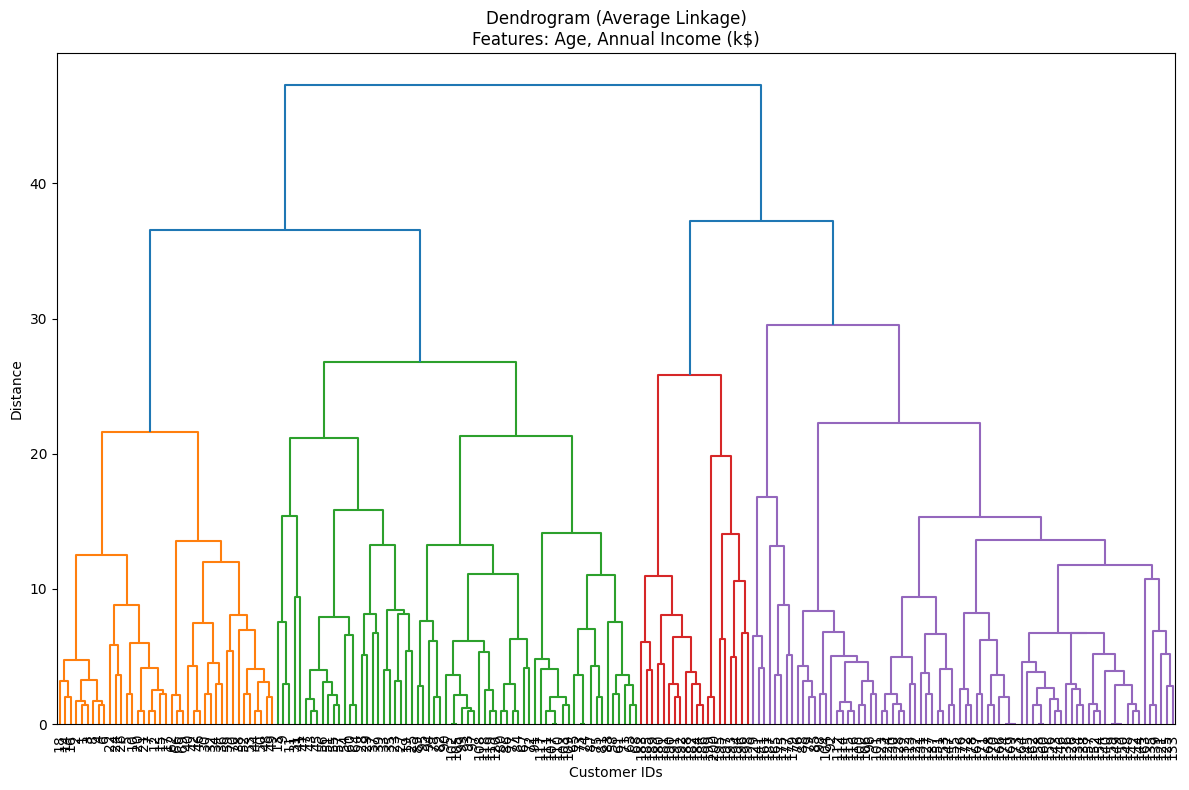

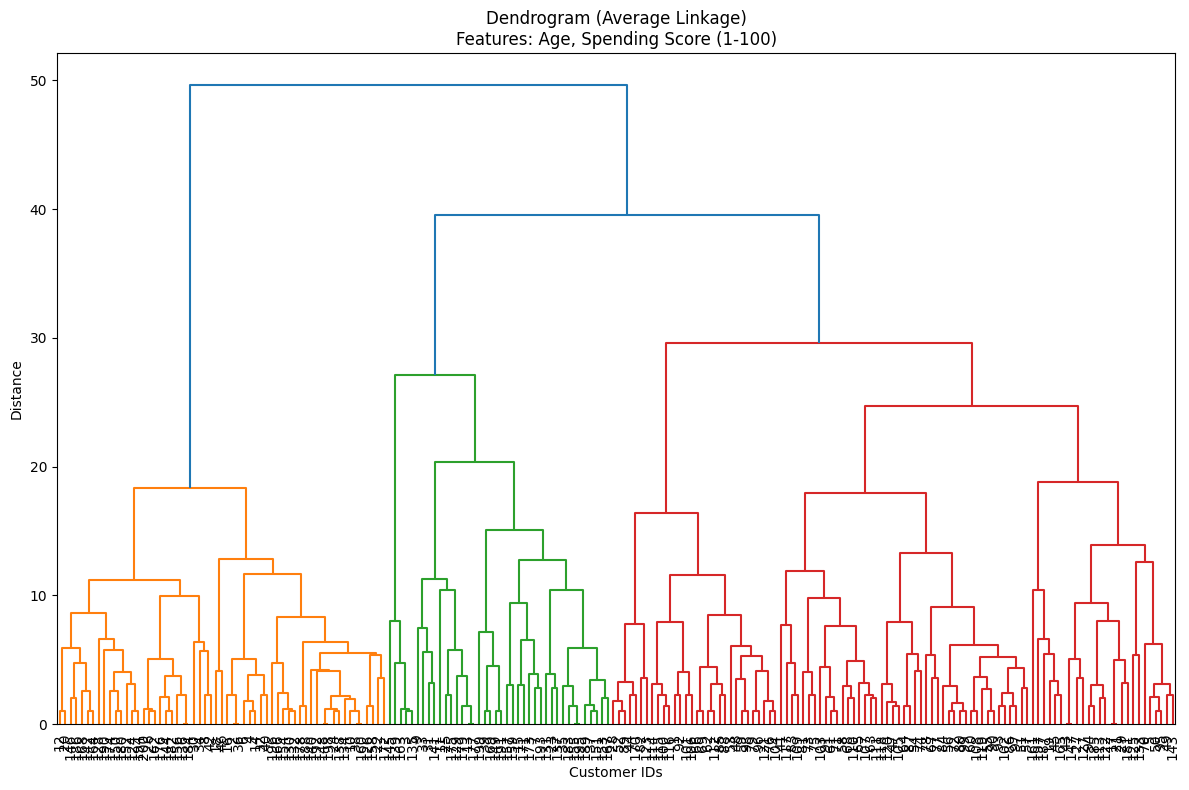

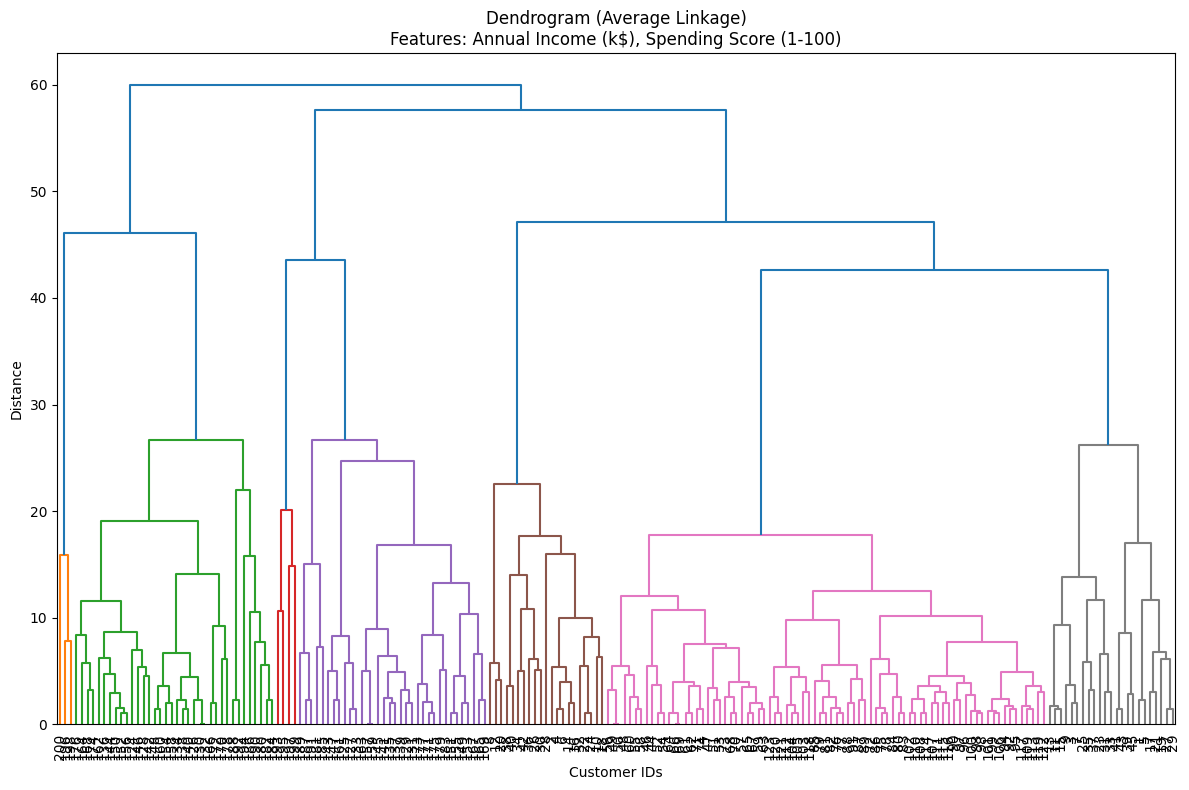

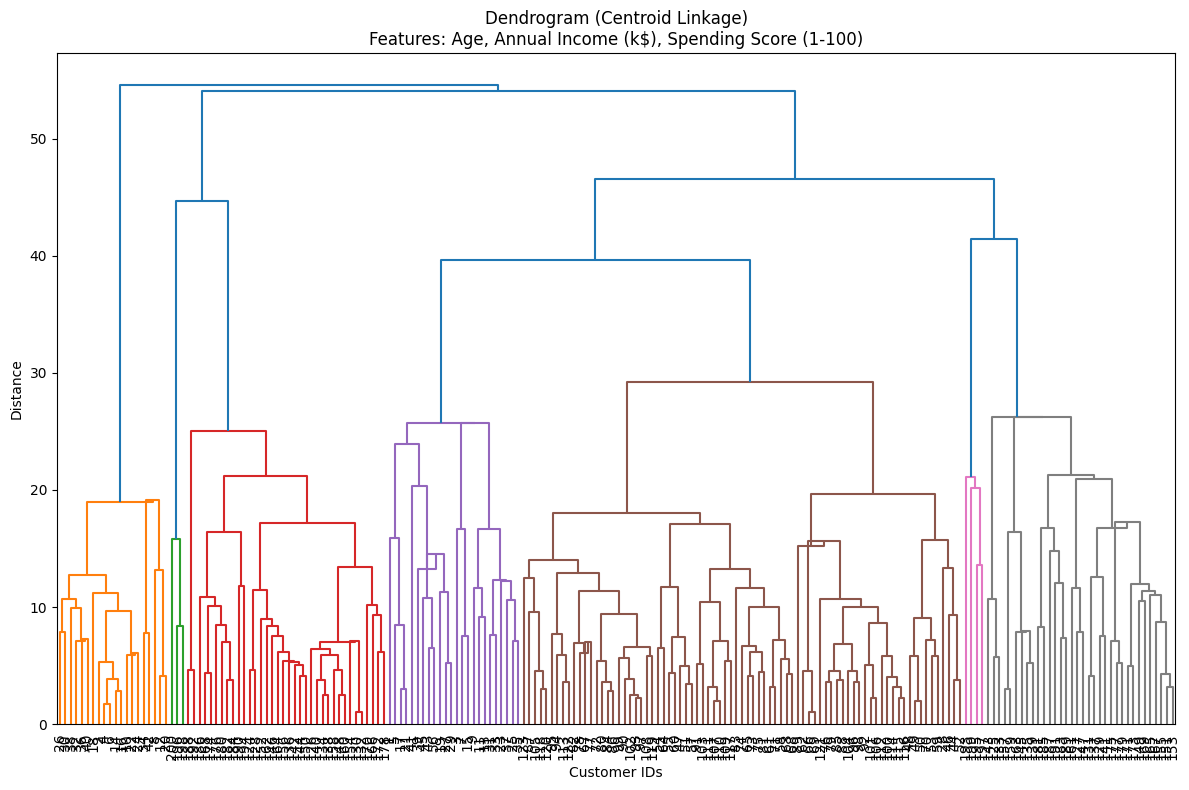

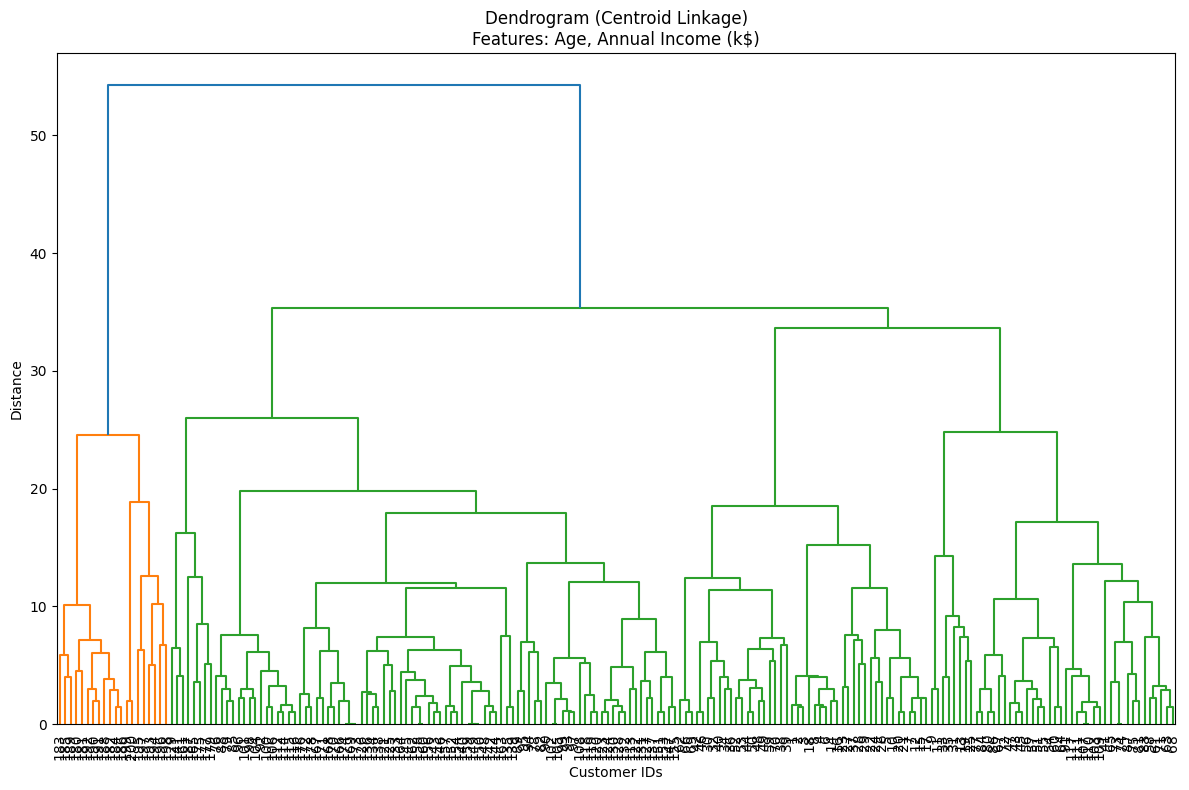

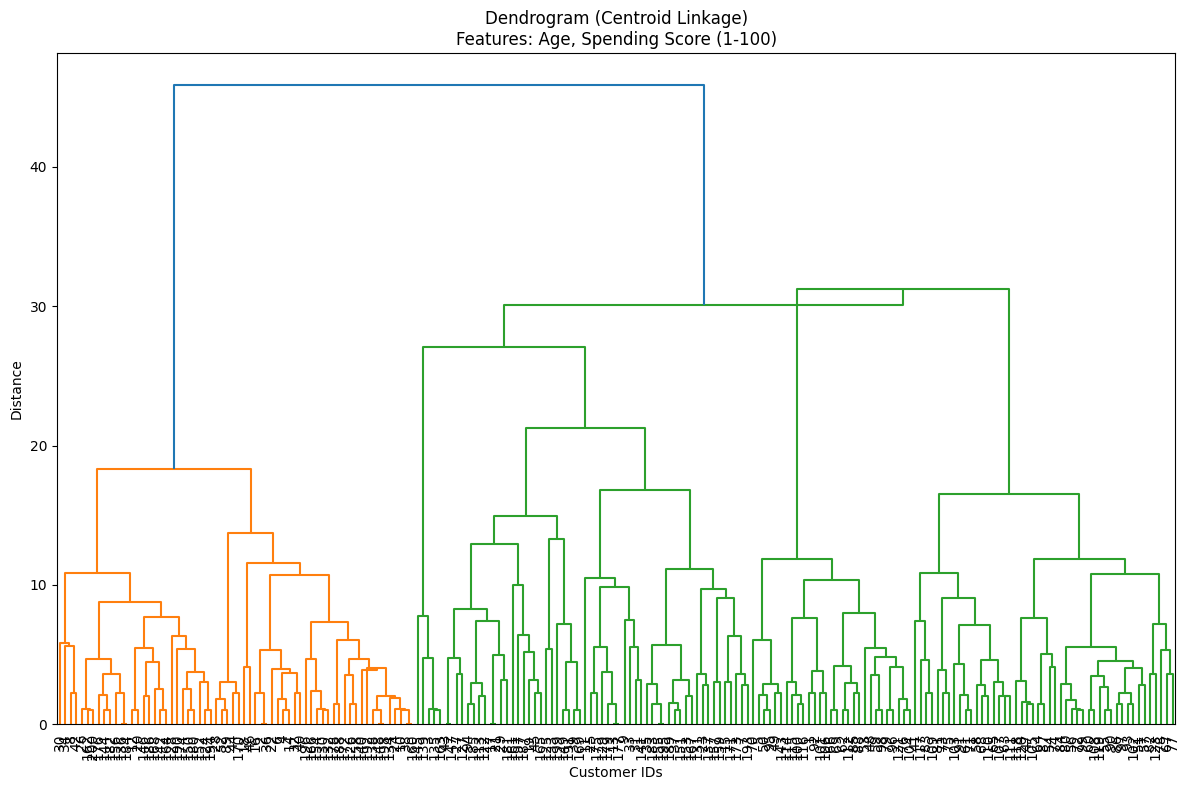

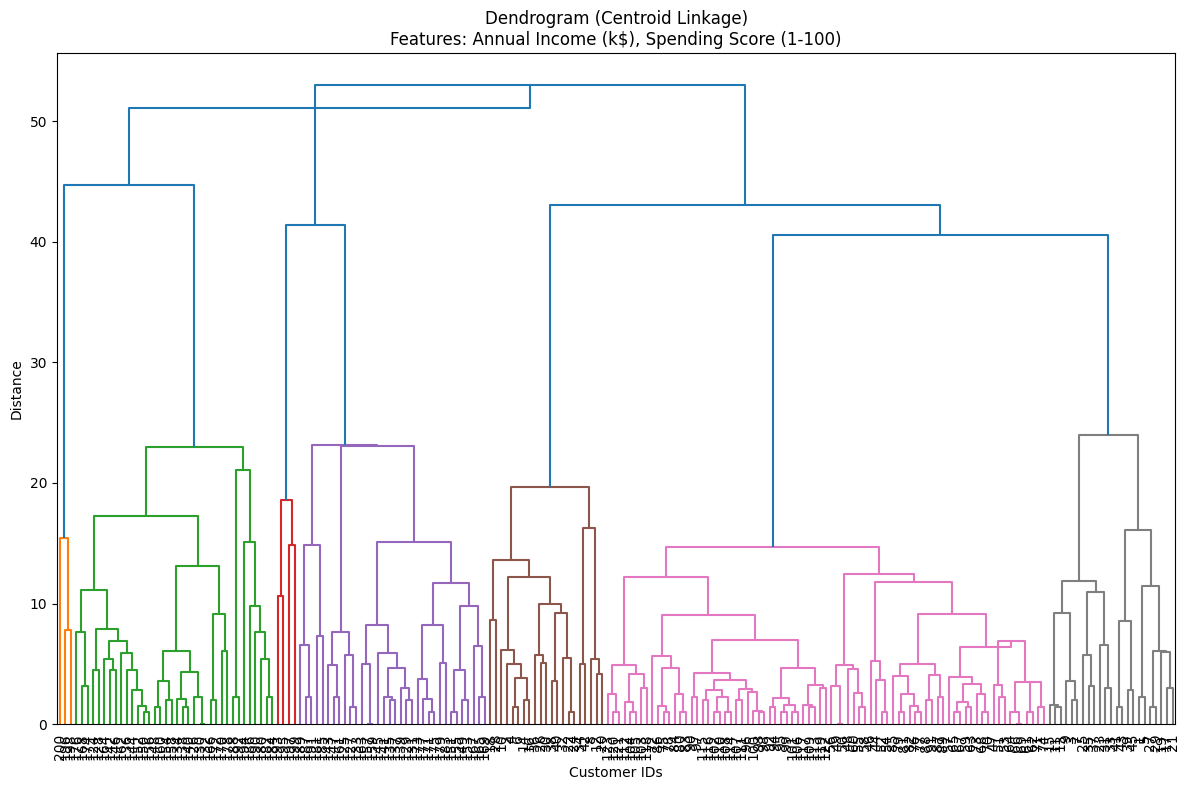

In [26]:
linkage_methods = ['single', 'complete', 'average', 'centroid']

feature_sets = [
    ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'],
    ['Age', 'Annual Income (k$)'],
    ['Age', 'Spending Score (1-100)'],
    ['Annual Income (k$)', 'Spending Score (1-100)'],
]

for method in linkage_methods:
    for features_subset in feature_sets:
        plt.figure(figsize=(12, 8))
        
        # Extract the selected features
        features = customer_dataset[features_subset]
        
        # Perform hierarchical clustering with the current method and feature subset
        linkage_matrix = linkage(features, method)
        
        dendrogram(linkage_matrix, labels = customer_dataset['CustomerID'].tolist(), leaf_font_size=10, orientation='top')
        plt.title(f'Dendrogram ({method.capitalize()} Linkage)\nFeatures: {", ".join(features_subset)}')
        plt.xlabel('Customer IDs')
        plt.ylabel('Distance')
        
        # Adjust layout and spacing
        plt.tight_layout()
        
        # Show the plot for this combination
        plt.show()
        

**Single Linkage:**
In general, single linkage tends to produce clusters that are more elongated and have a chain-like structure.
Single linkage is sensitive to outliers, which can lead to long branches in the dendrogram as it tries to merge distant points.
This method might not work well for feature subsets involving 'Annual Income' and 'Spending Score,' as it can create scattered clusters.
Complete Linkage:

**Complete linkage** often results in compact, spherical clusters.
It is less sensitive to outliers, and you can see well-defined clusters in the dendrograms.
For most feature subsets, it creates clusters that are relatively balanced and have similar sizes.
Average Linkage:

**Average linkage** provides a balance between single and complete linkage.
It can create clusters that are not as elongated as with single linkage, but not as spherical as with complete linkage.
It works well for various feature subsets, producing reasonably balanced clusters.
Centroid Linkage:

**Centroid linkage** considers the distance between cluster centroids.
It tends to create spherical clusters, and the dendrograms show relatively balanced cluster structures.
It is less sensitive to outliers and works well for different feature subsets.

**Height of Fusion (Y-Axis):** In a dendrogram, the vertical lines connecting clusters represent the height at which those clusters are merged. If you observe that clusters are merged at relatively low heights, it suggests that the data points within those clusters are close to each other, which can indicate more spherical clusters. Conversely, if clusters are merged at greater heights, it may indicate more scattered or elongated clusters.

**Branching Patterns:** The branching patterns in a dendrogram can also provide insights into the shapes of clusters. If you see a tight cluster of branches with many subclusters merging at a similar height, it might suggest spherical or compact clusters. In contrast, if you observe long branches with few subclusters merging at various heights, it can indicate more scattered or irregularly shaped clusters.

## Gene expression dataset

In [27]:
# Loading the dataset
path = '/home/sruj/Downloads/SMAI-Dataset-gene-expression/gene.csv'
gene_dataset = pd.read_csv(path)
gene_dataset.head(10)


,ID_REF,GSM613412,GSM613413,GSM613414,GSM613415,GSM613416,GSM613417,GSM613418,GSM613419,GSM613420,GSM613421,GSM613422,GSM613423
0,10338001,5192.23000,5974.65000,5393.02000,5158.65000,5244.96000,5143.31000,4621.77000,5173.65000,5811.77000,5465.11000,4972.57000,4528.70000
1,10338002,301.50300,307.67700,362.59600,372.77600,299.98000,308.91200,311.88300,331.53300,344.16100,365.17200,357.14600,372.43600
2,10338003,1850.11000,2037.54000,1891.18000,1752.97000,1718.80000,1762.98000,1630.54000,1905.87000,2141.35000,1891.99000,1652.14000,1593.69000
3,10338004,927.98300,1140.82000,936.43300,918.44000,930.31300,926.49600,793.72900,936.18400,1041.49000,942.37700,891.35900,826.81100
4,10338005,5.24974,5.01730,5.09585,3.76912,5.54982,5.27357,3.79682,4.66623,5.68881,5.25432,4.66148,3.93062
5,10338006,9.38796,8.48125,8.84217,6.57887,7.93186,8.89203,9.00878,8.01693,9.97759,9.42498,8.14469,7.04968
6,10338007,21.05370,21.97490,20.08910,18.08180,19.94690,18.88650,18.27040,18.69870,22.72940,20.63030,18.47490,17.29990
7,10338008,48.83050,52.57320,48.16540,52.53910,45.28810,46.77410,47.38890,50.22880,49.29140,51.55040,47.68180,48.11590
8,10338009,677.66000,736.40400,913.22100,833.52800,797.24600,812.74600,793.95200,767.29900,807.24800,859.43700,835.13800,798.52200
9,10338010,5.66375,6.36667,4.81776,4.89682,5.17924,6.31512,4.89282,5.26197,6.01668,6.80280,4.90521,4.45203


In [28]:
gene_dataset.shape

(58, 13)

### Perform hierarchical clustering on the gene expression dataset and obtain the linkage matrix. Vary the linkages and features used and state your observations. Plot the dendogram, using the linkages obtained.

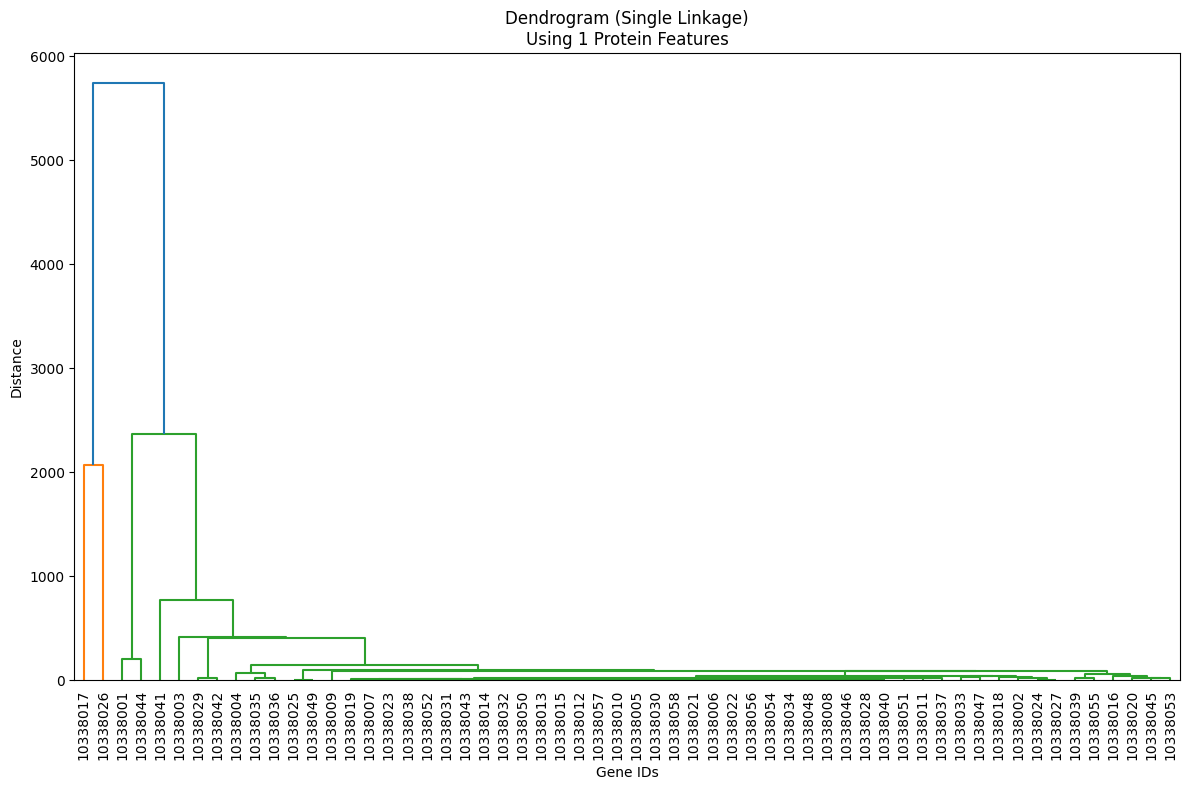

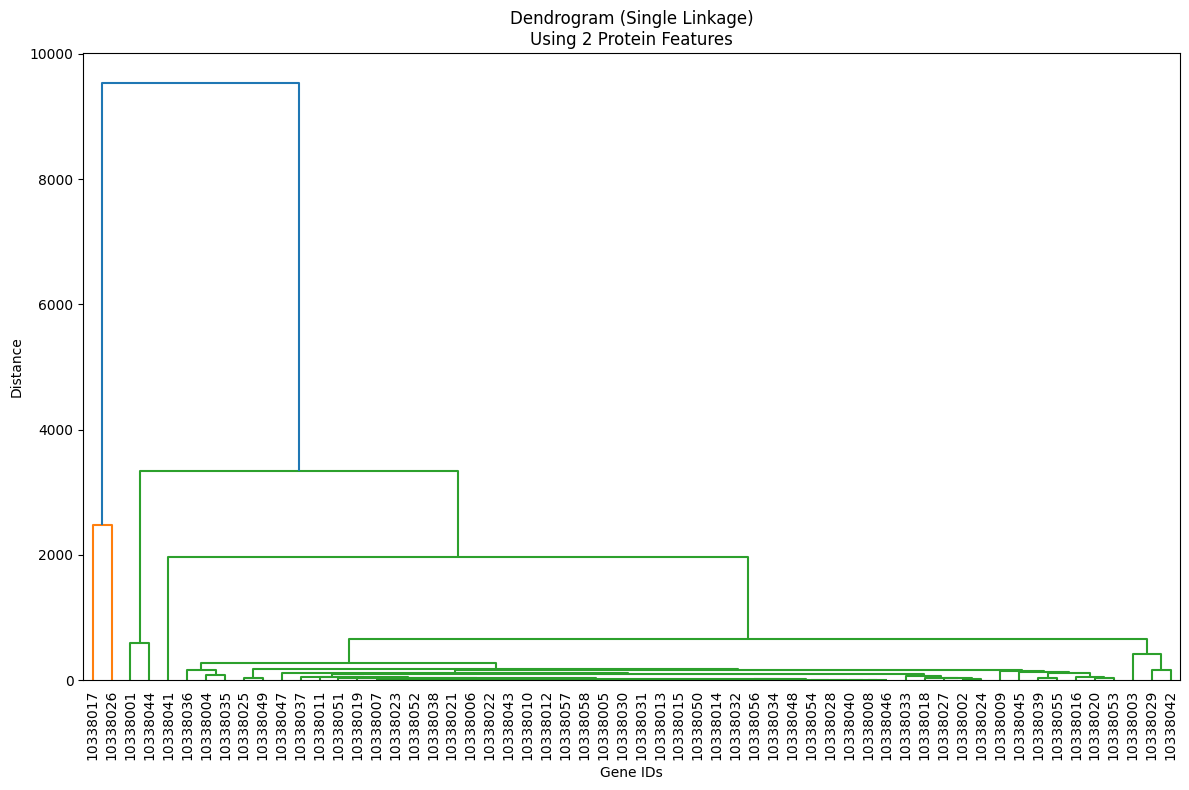

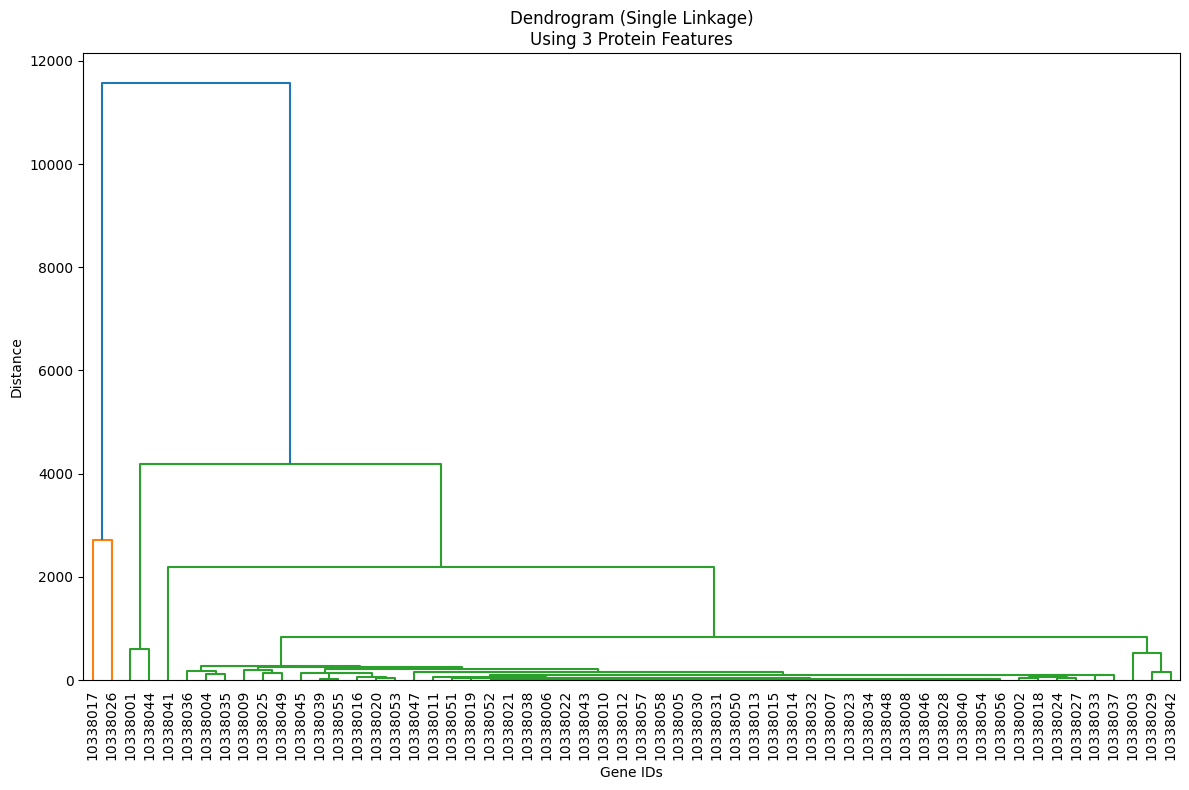

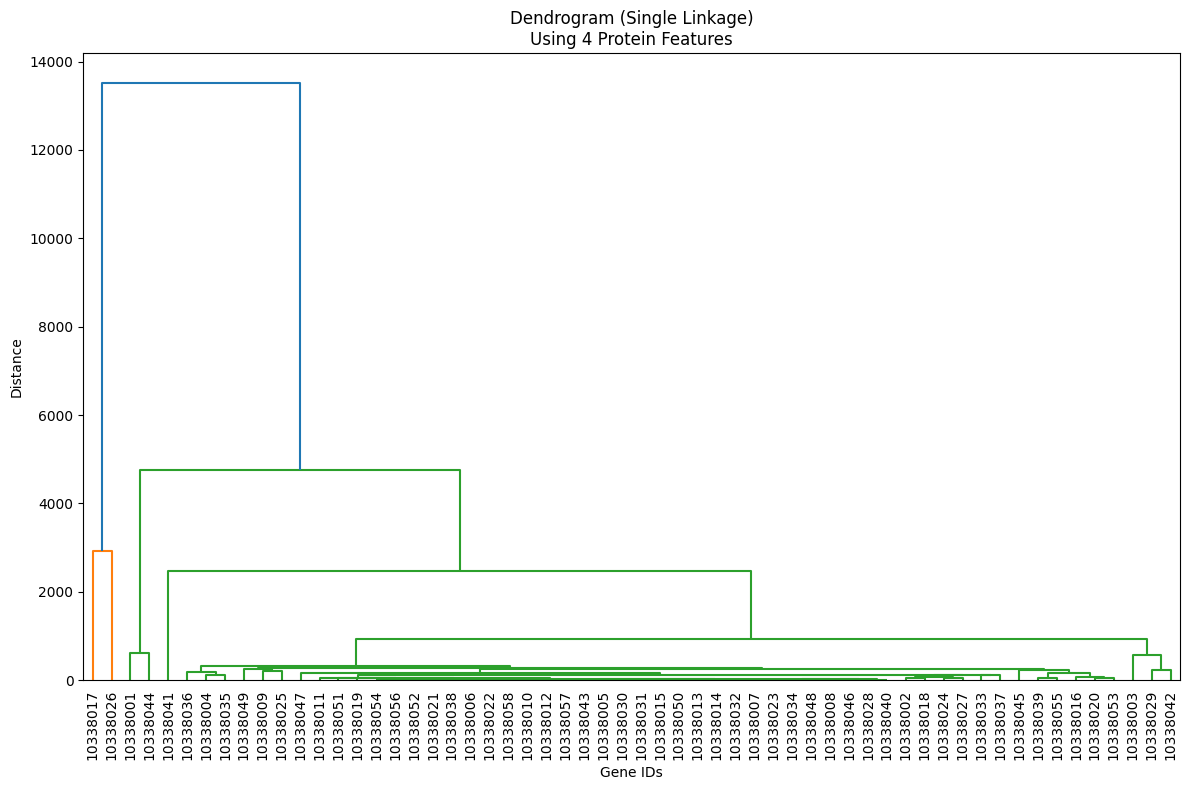

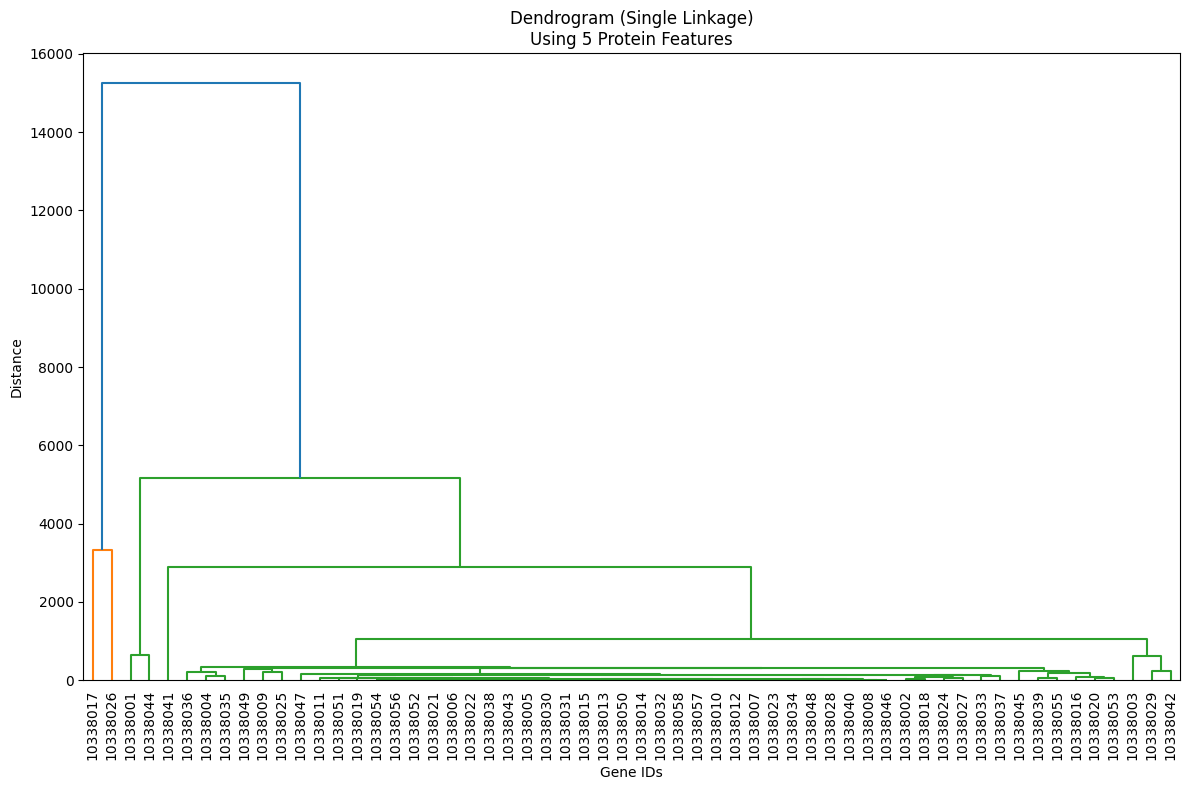

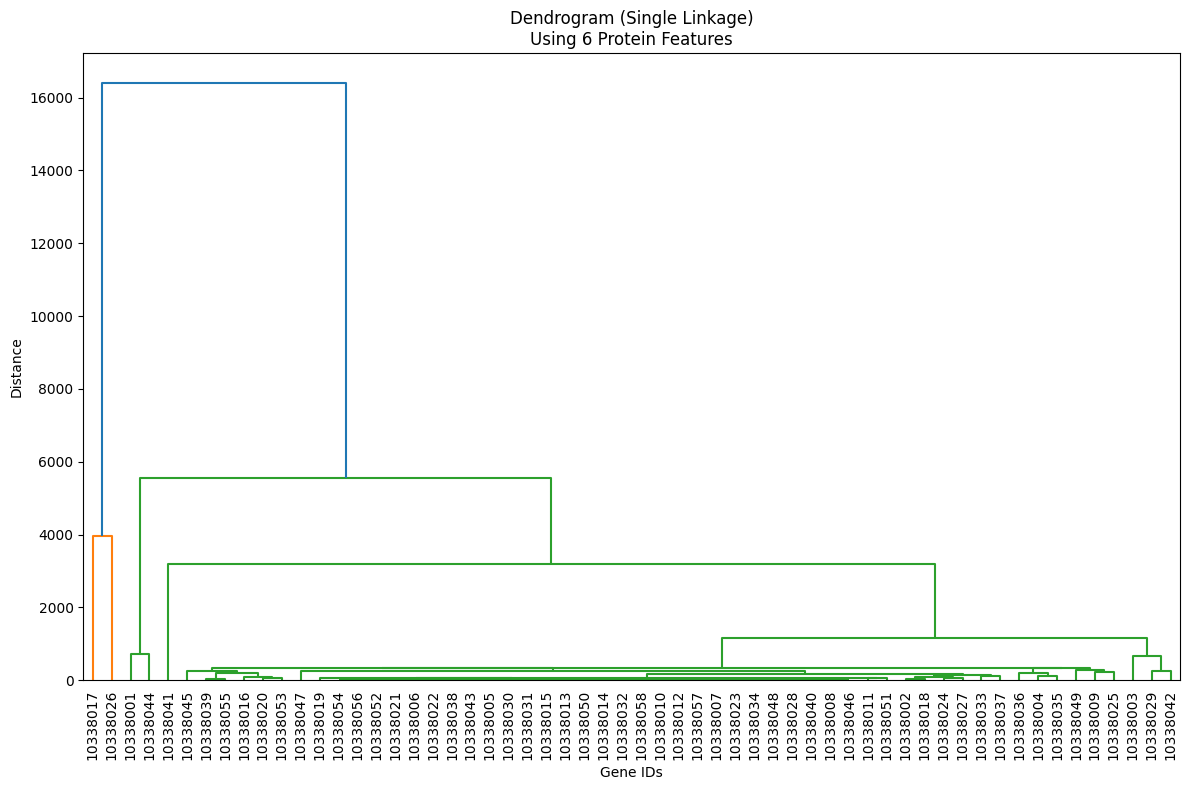

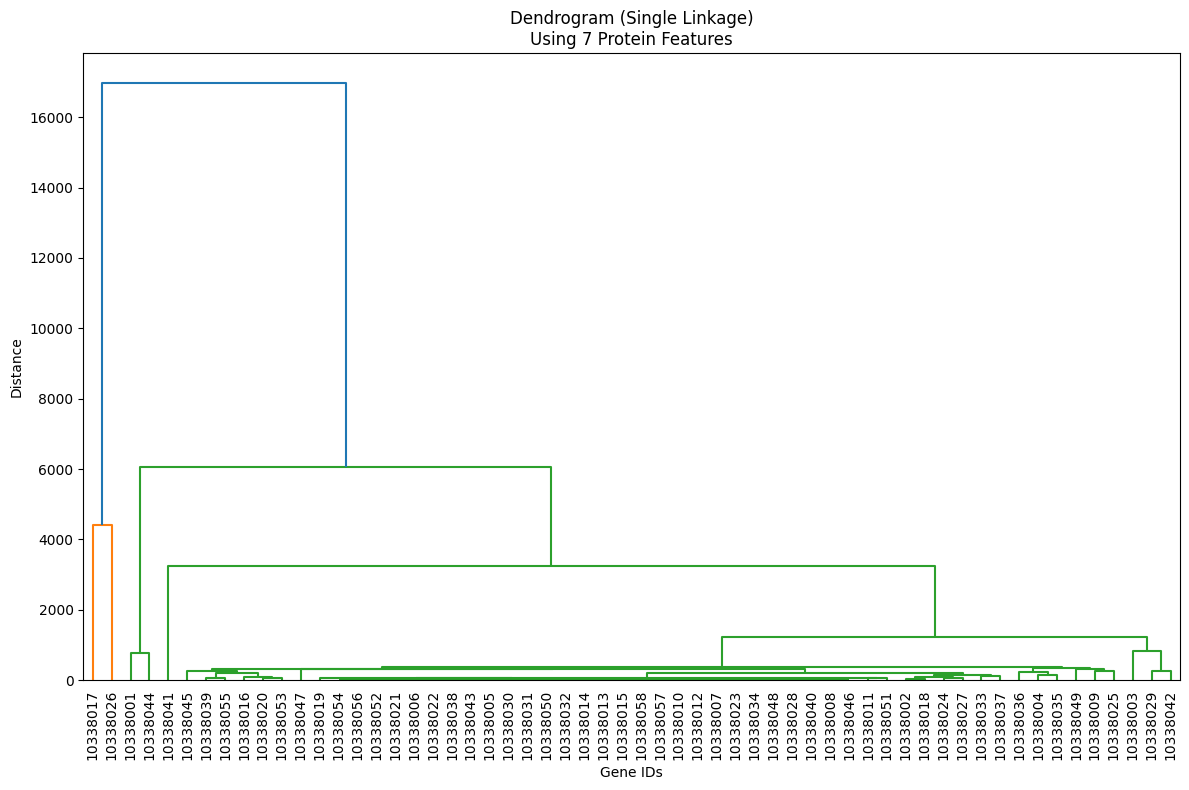

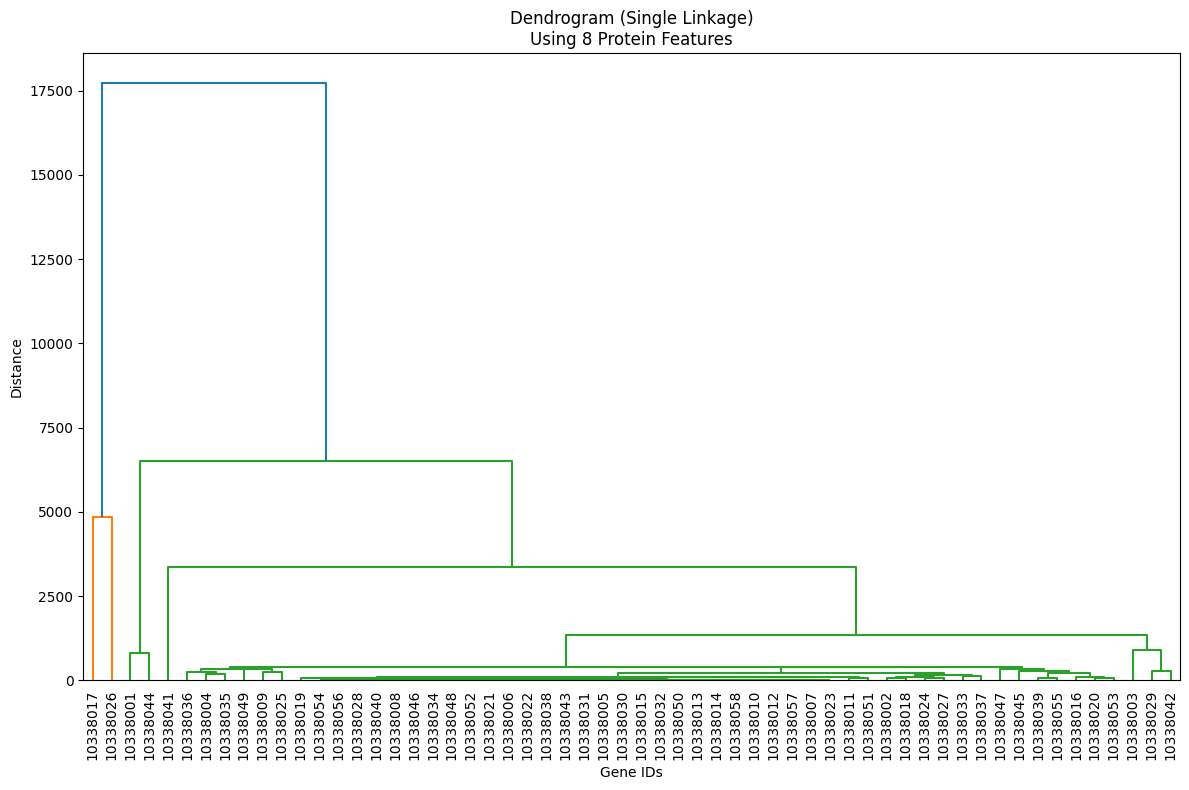

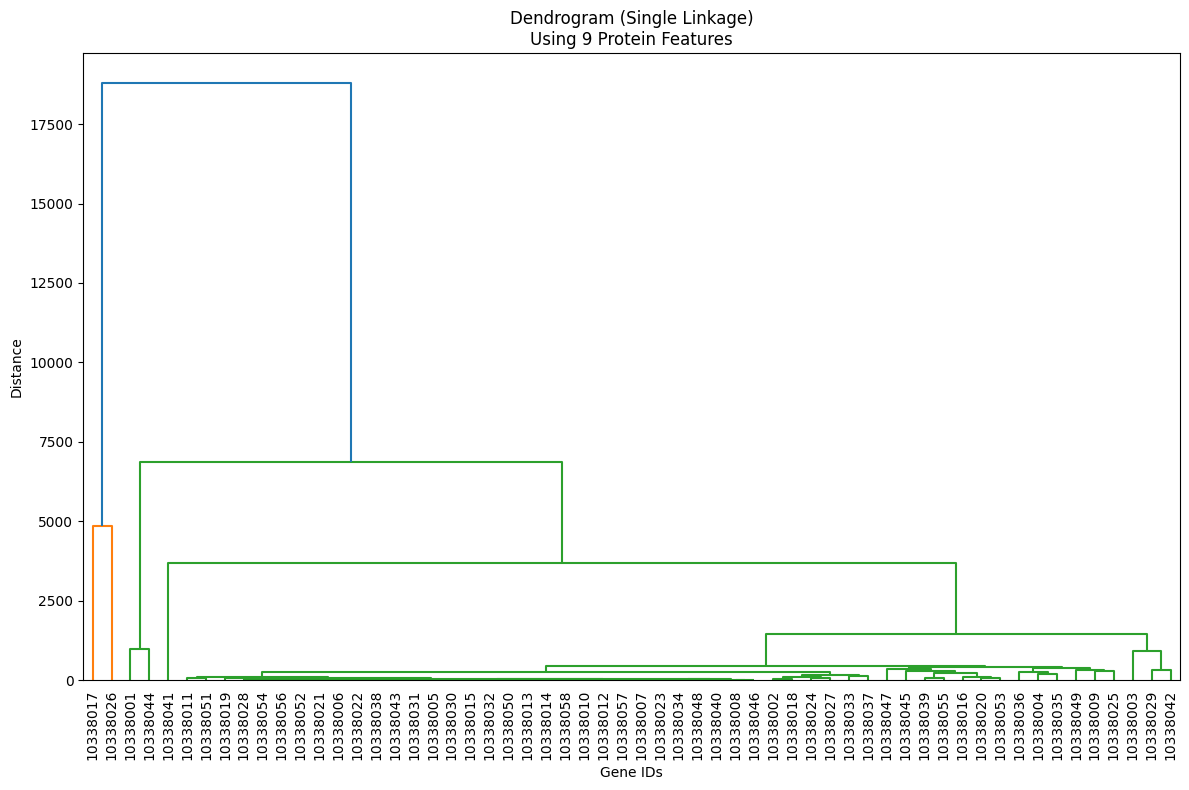

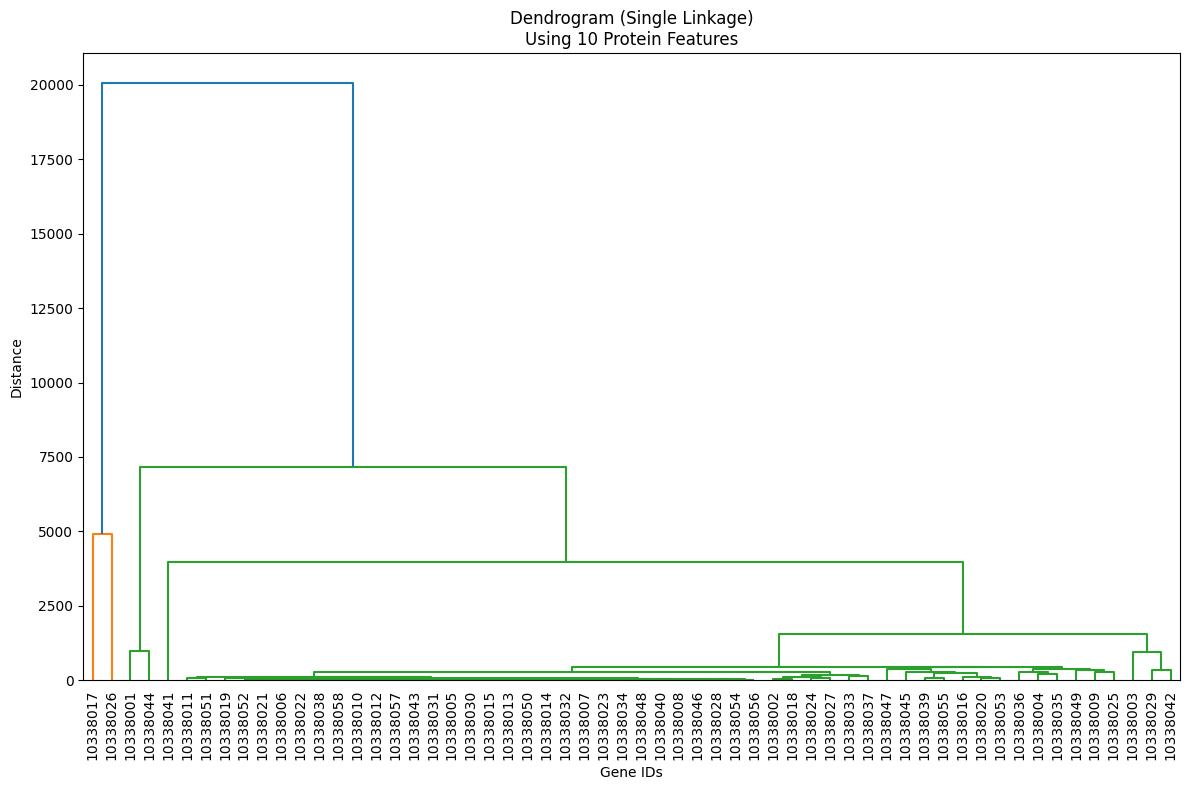

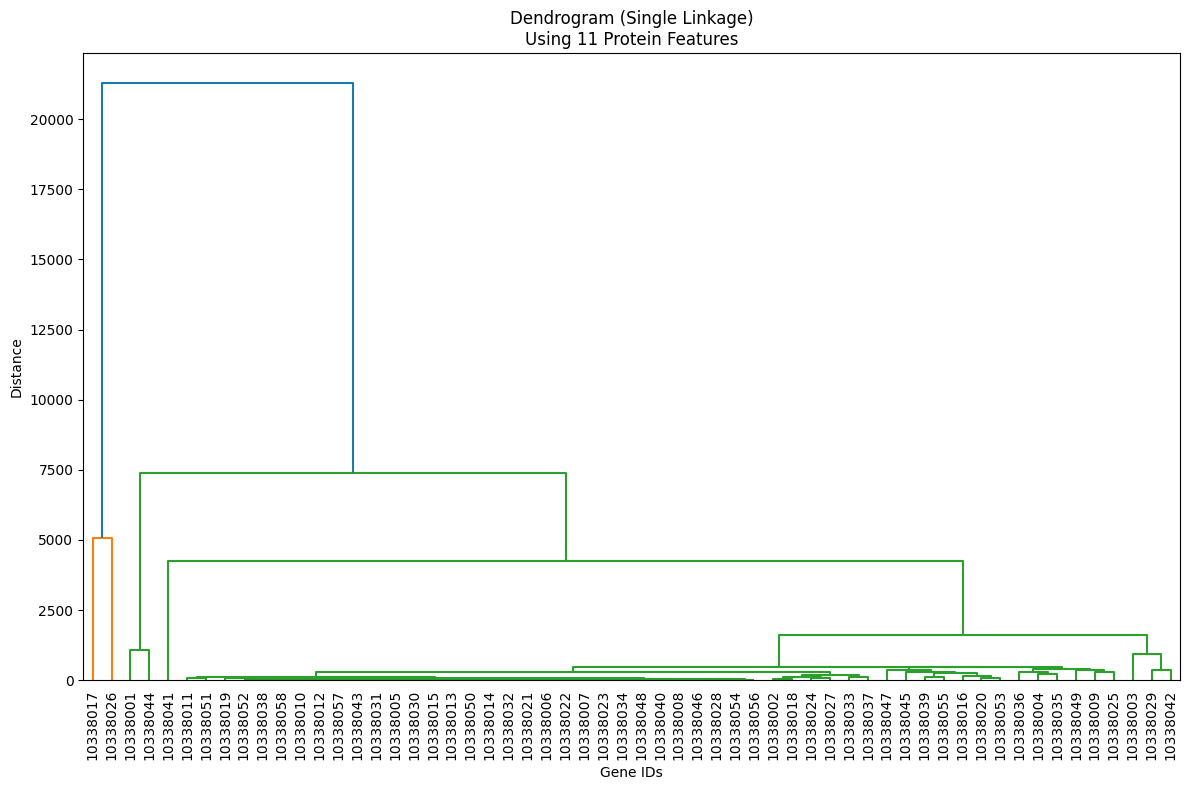

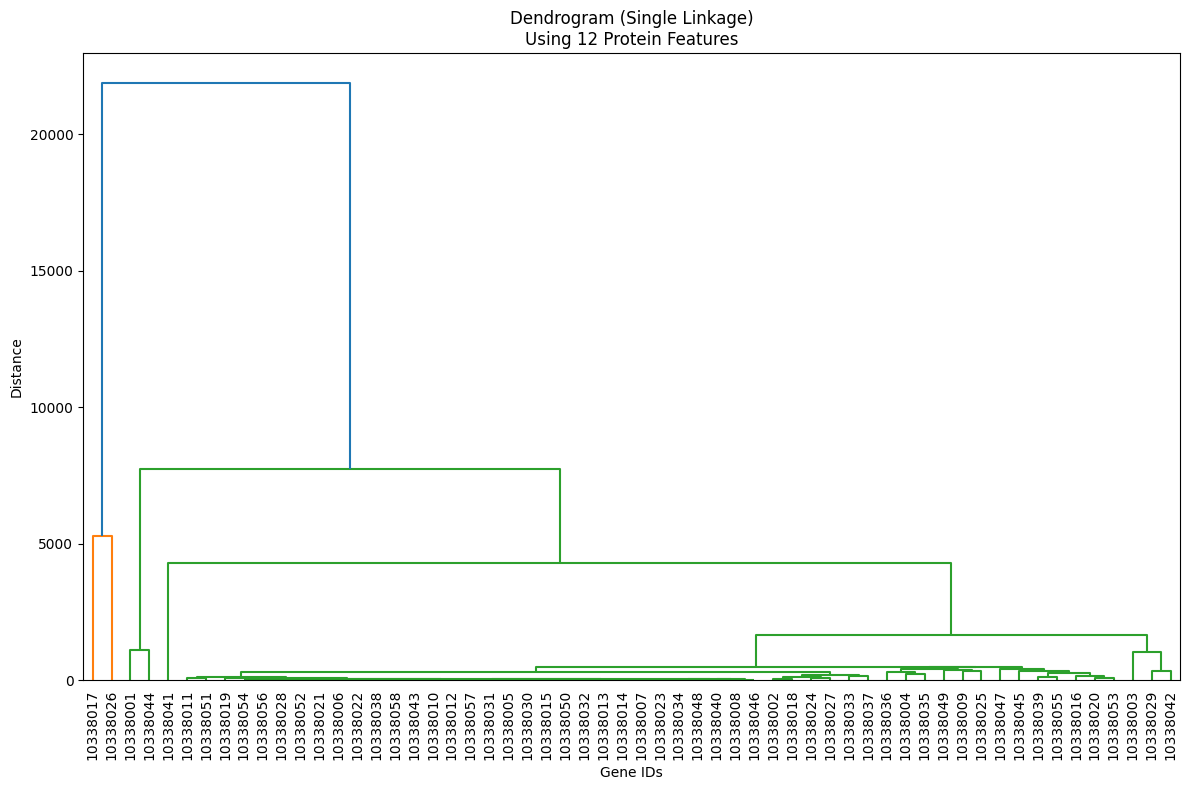

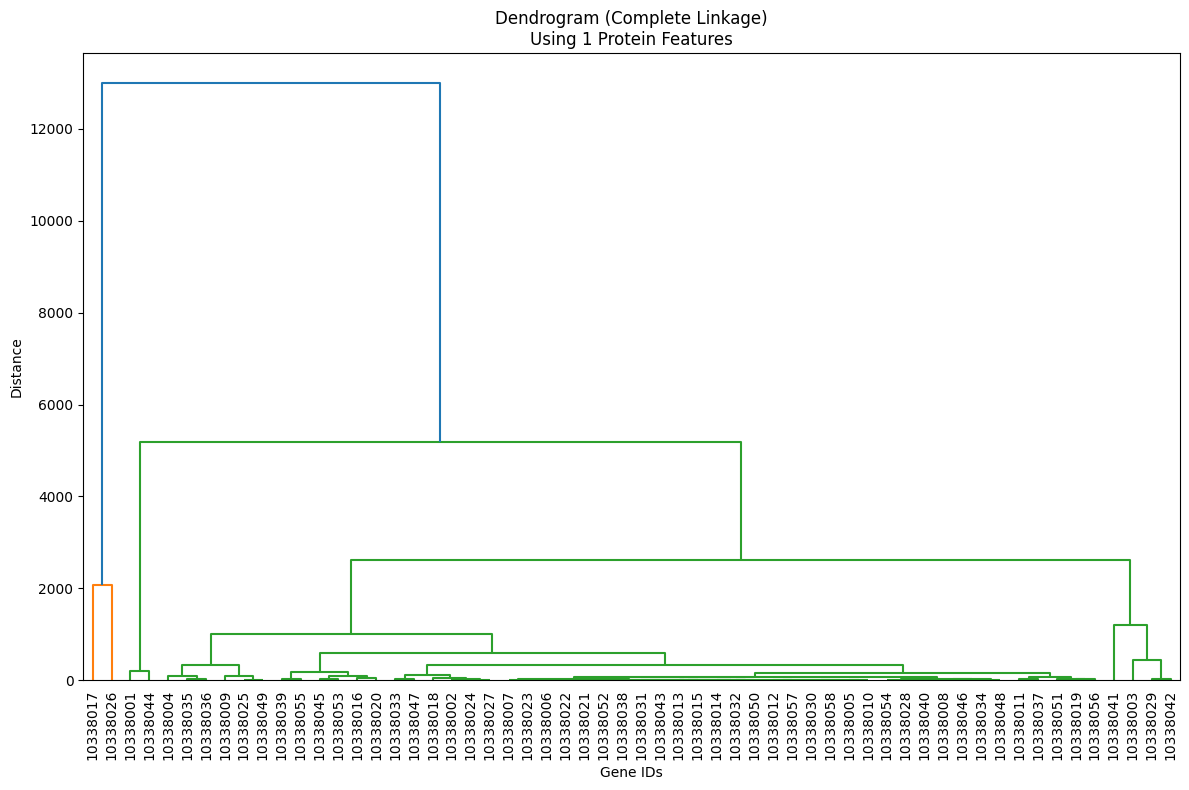

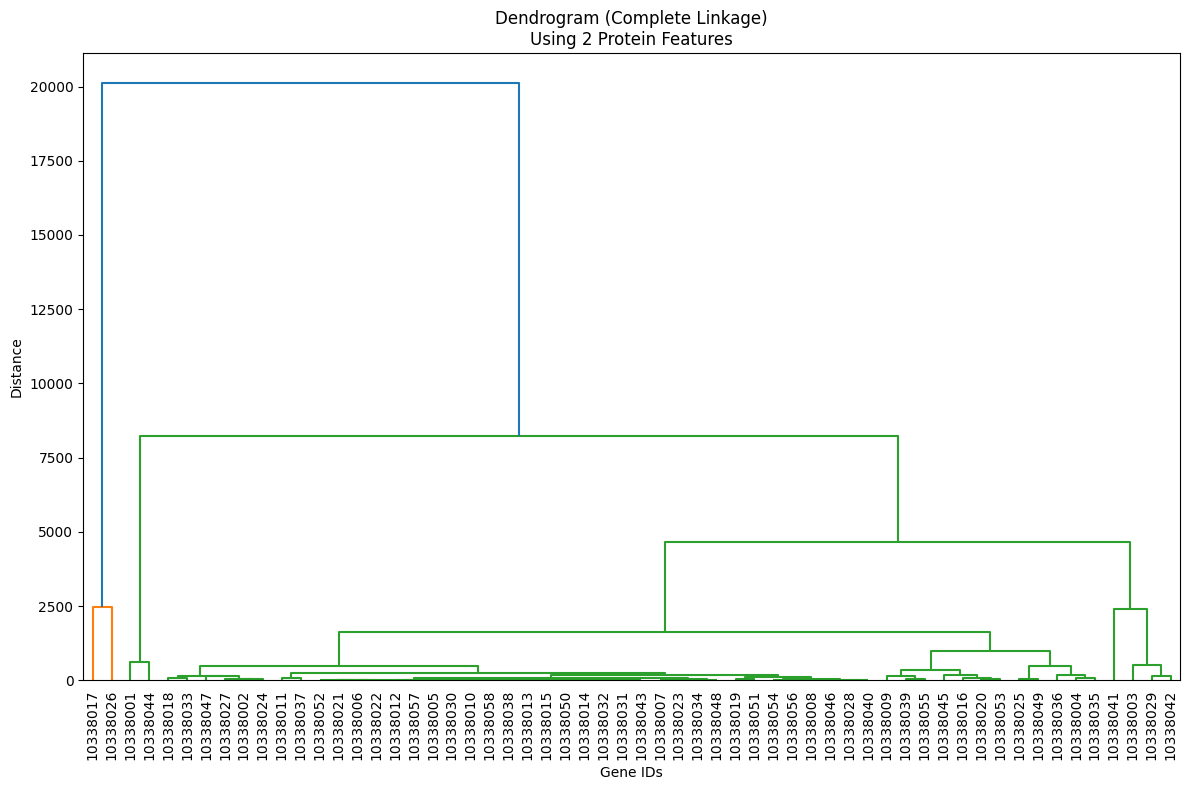

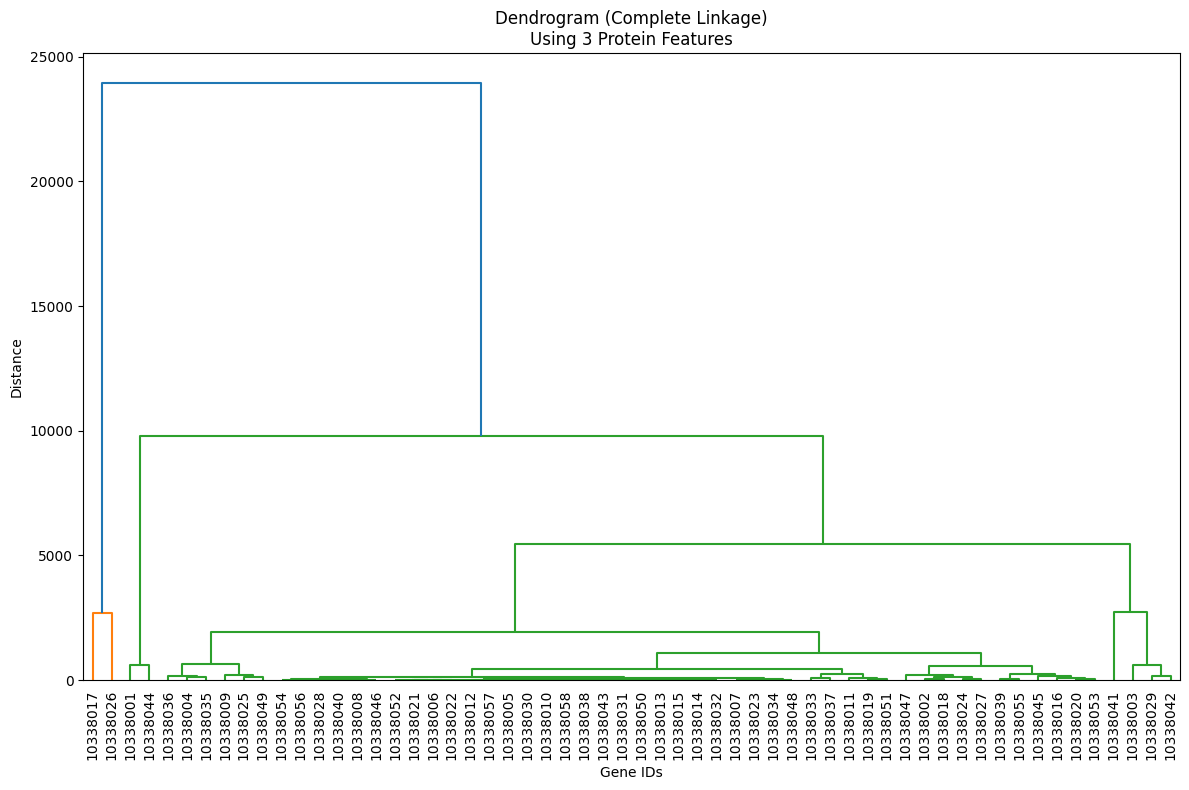

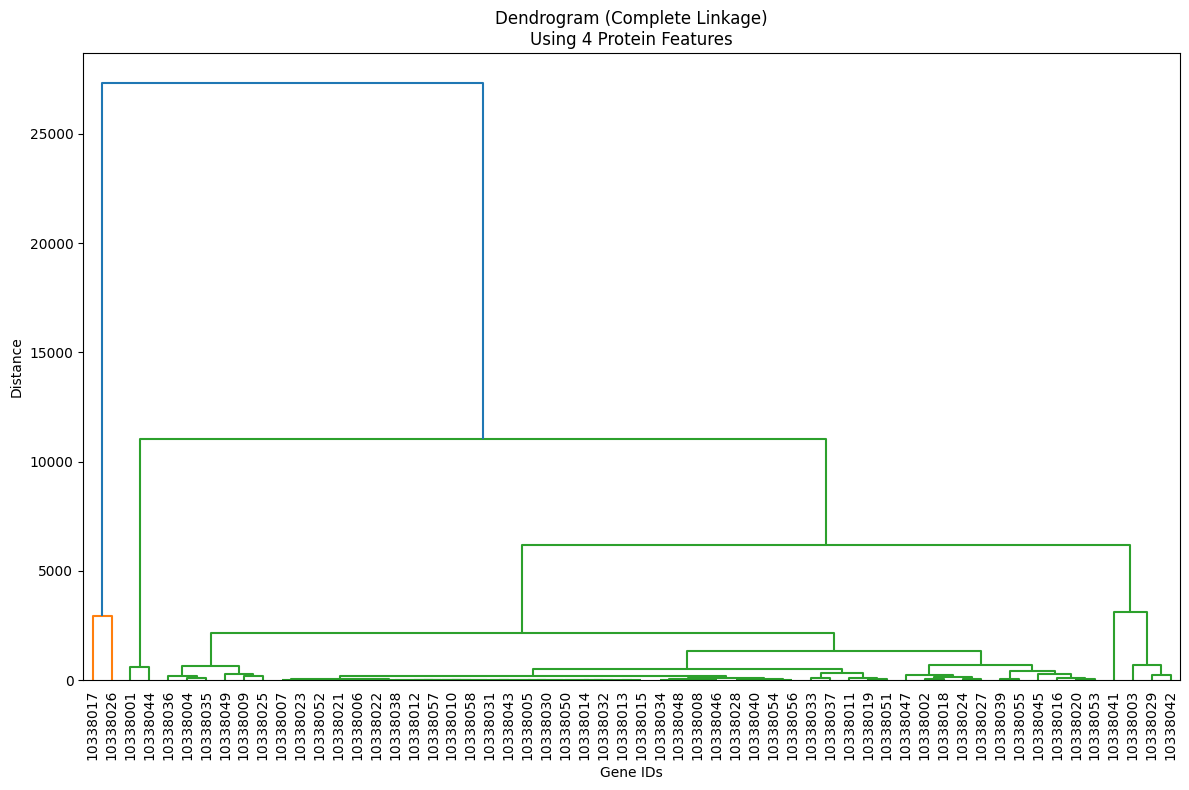

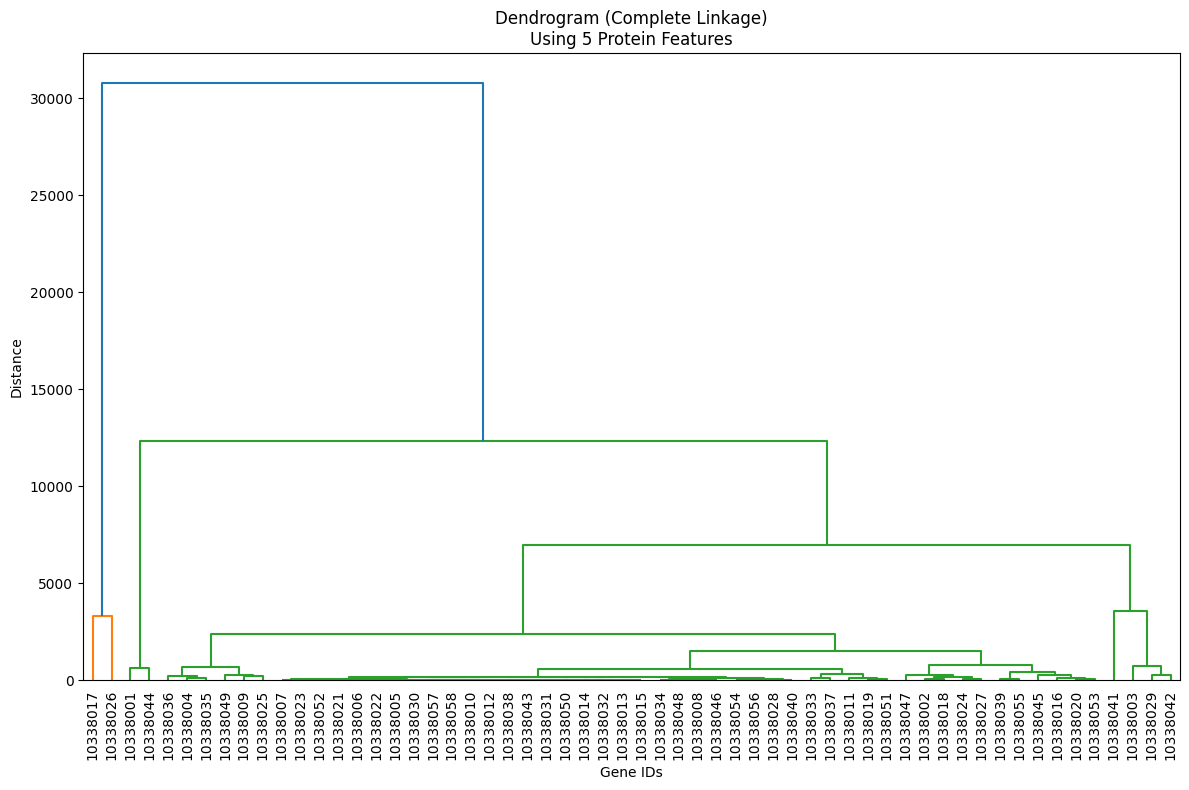

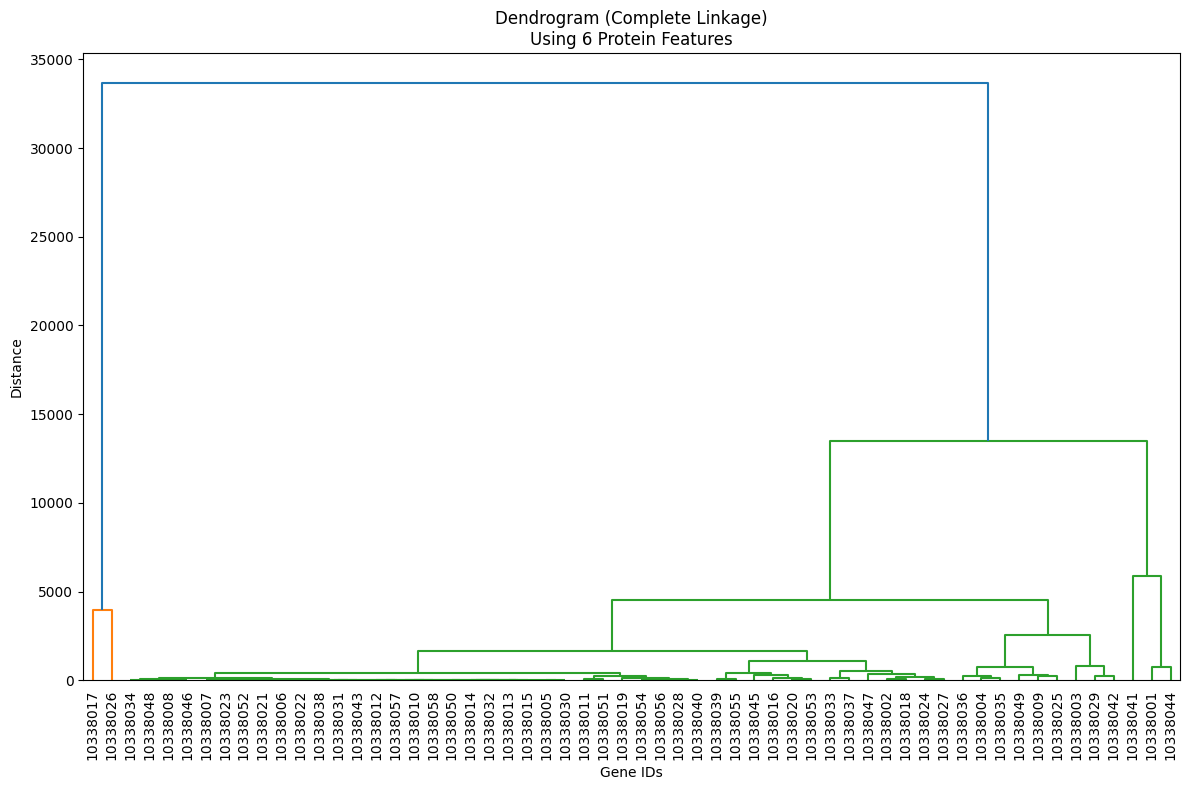

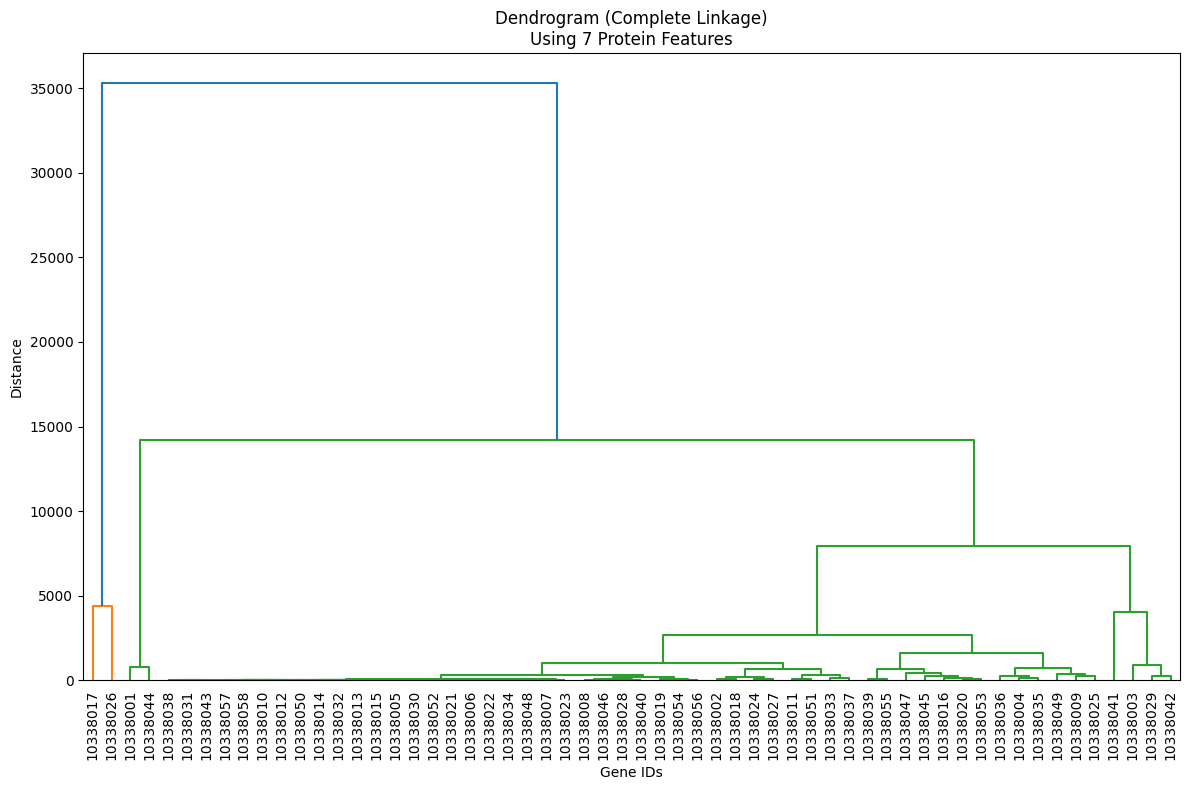

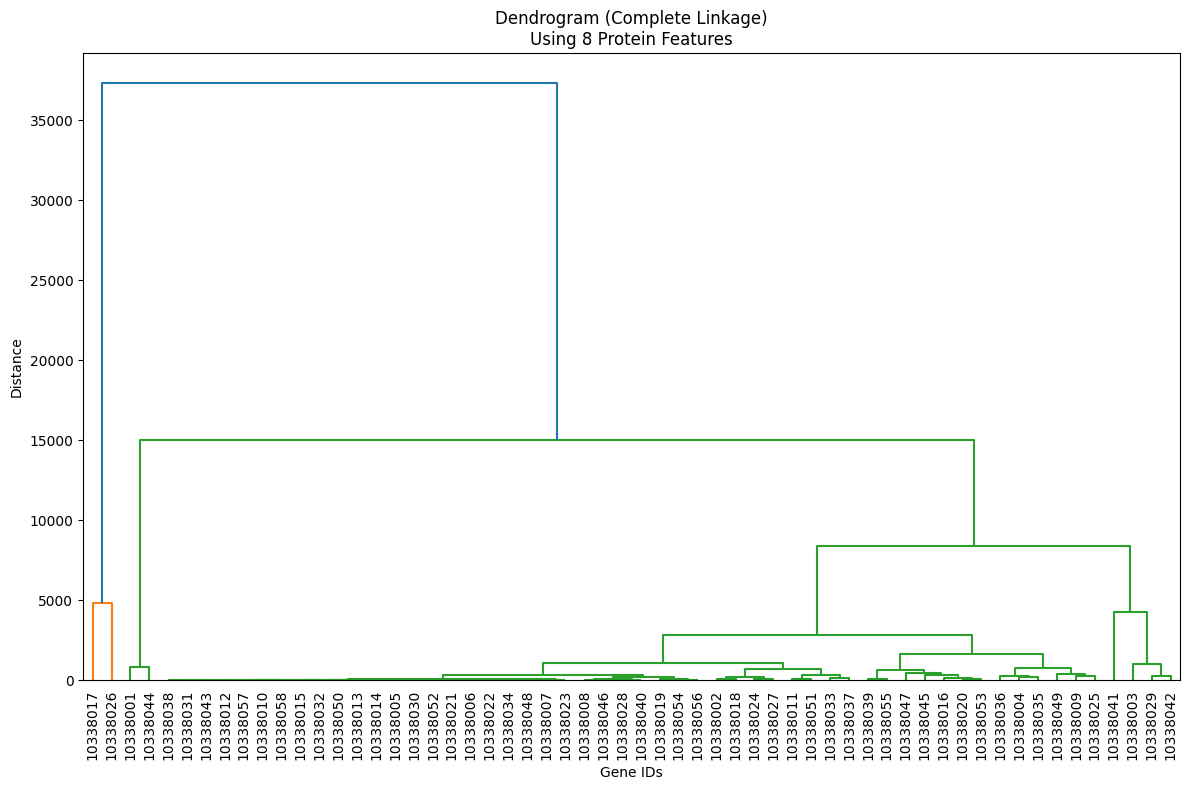

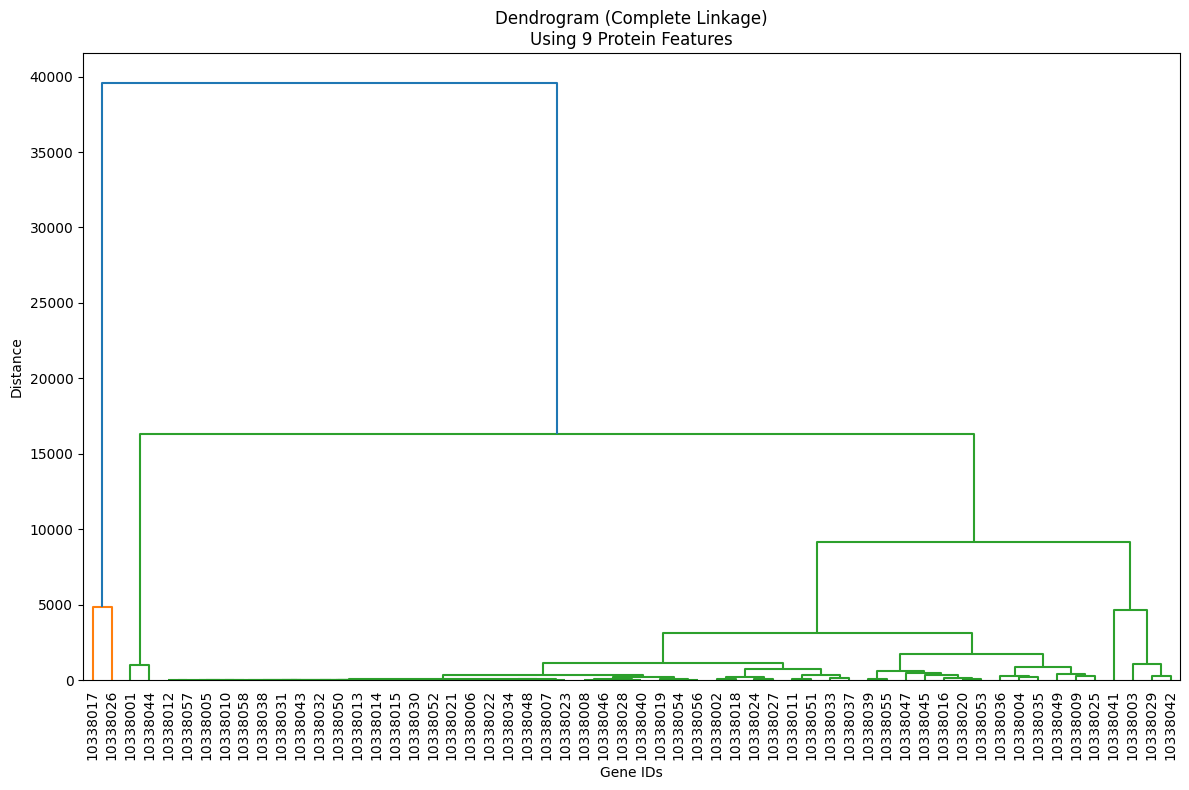

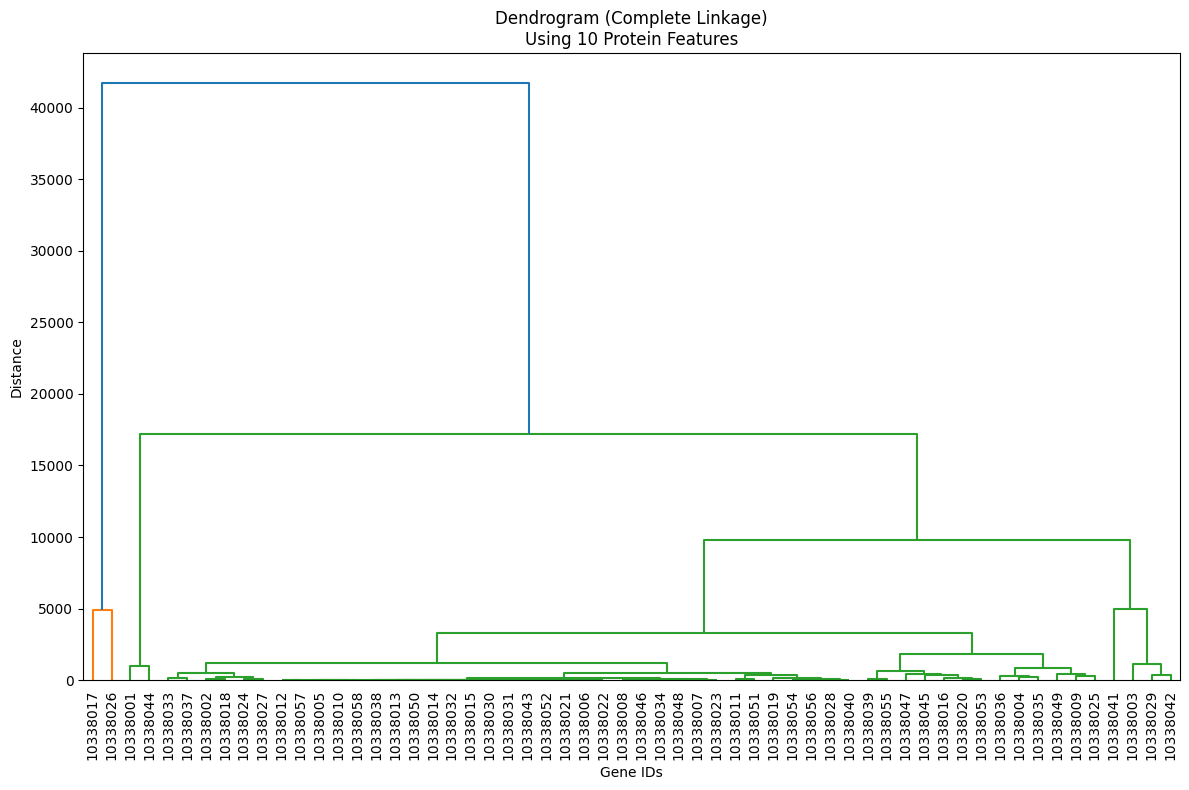

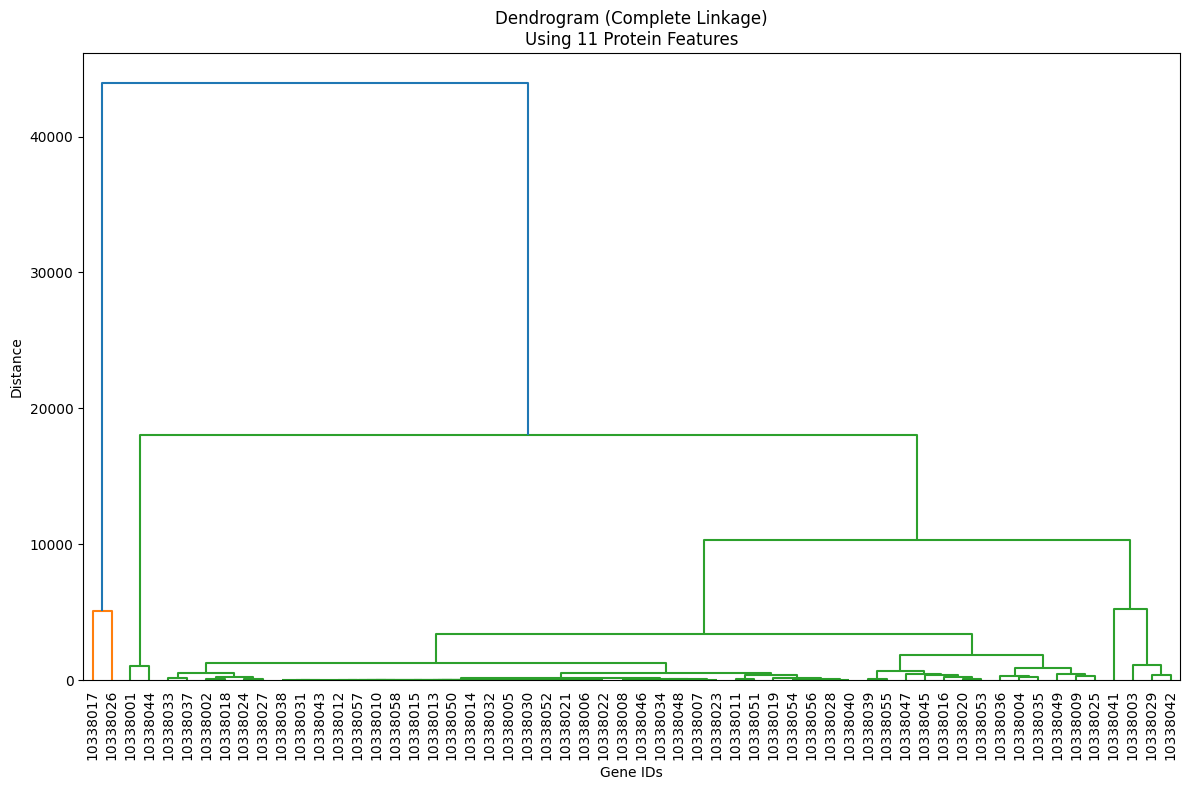

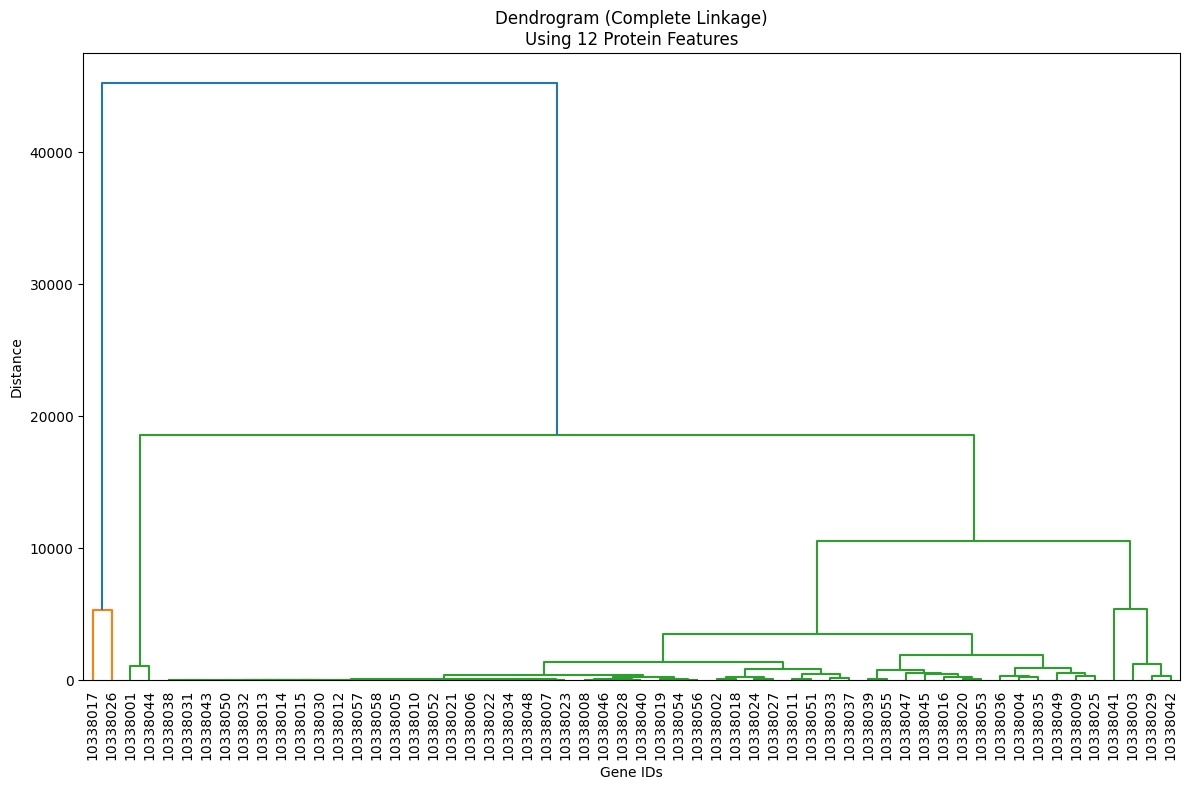

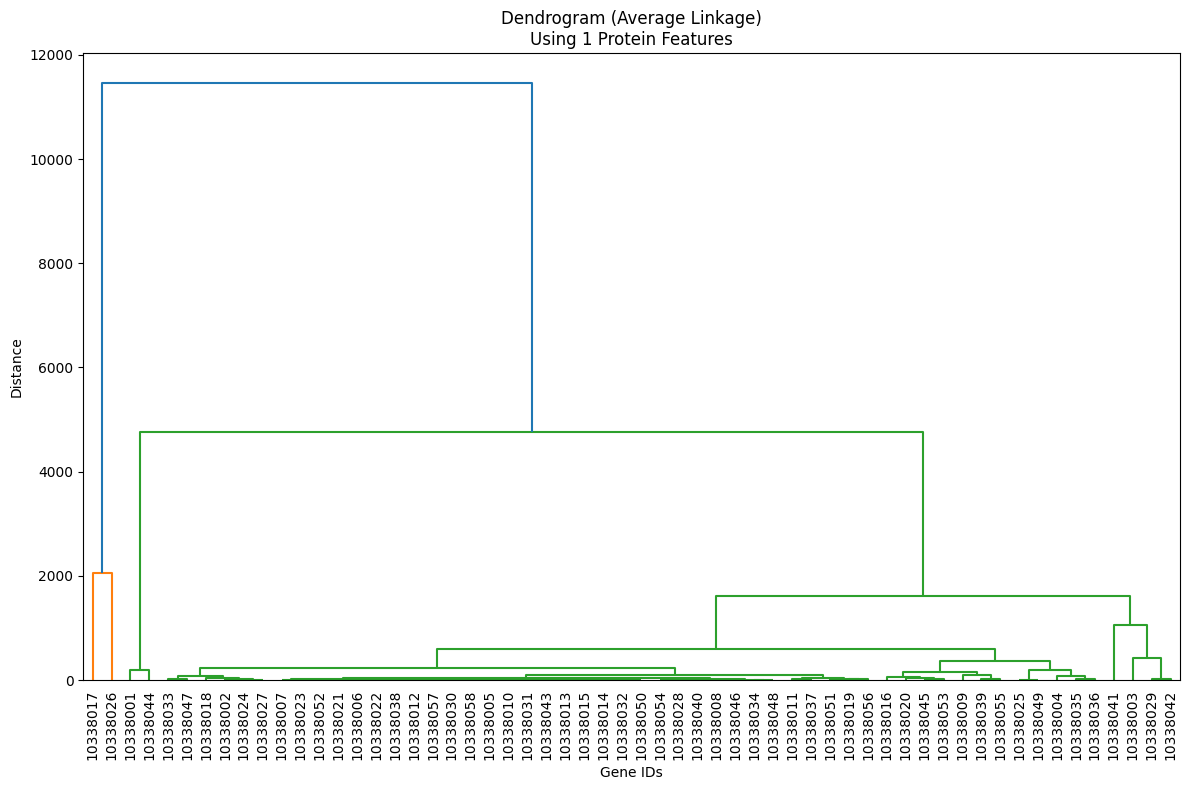

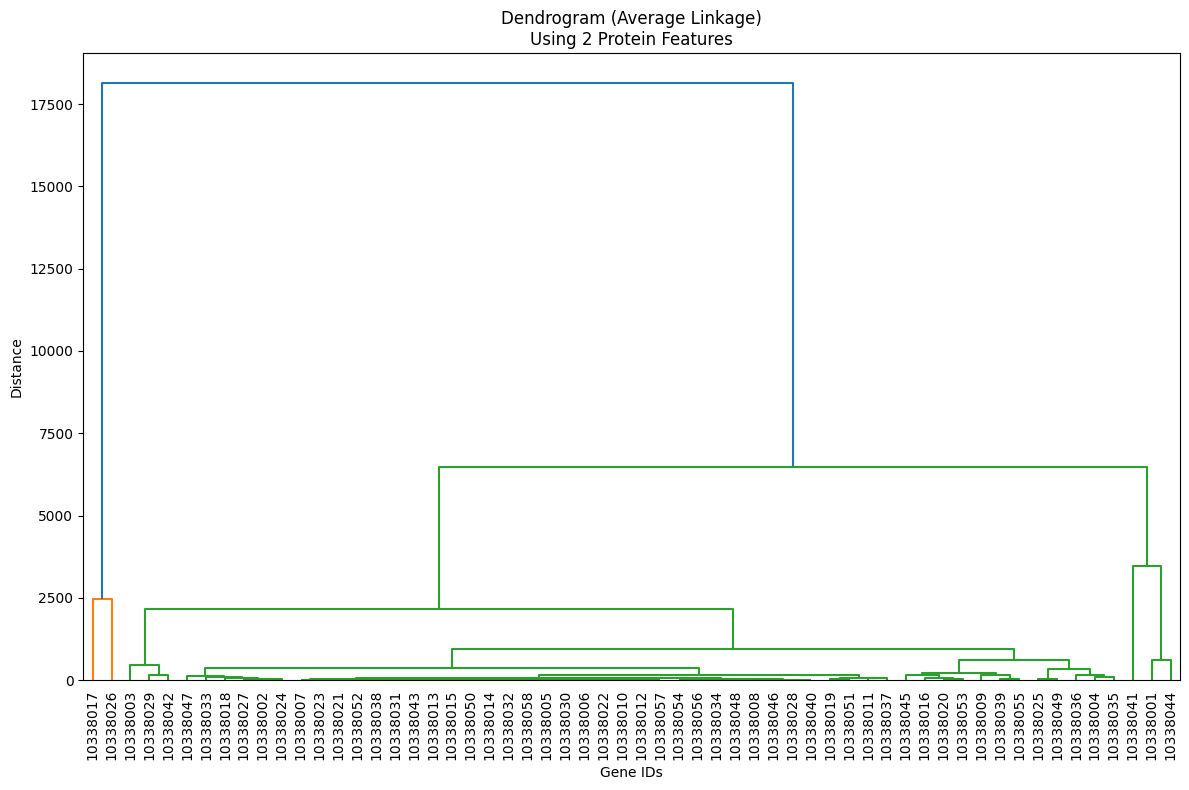

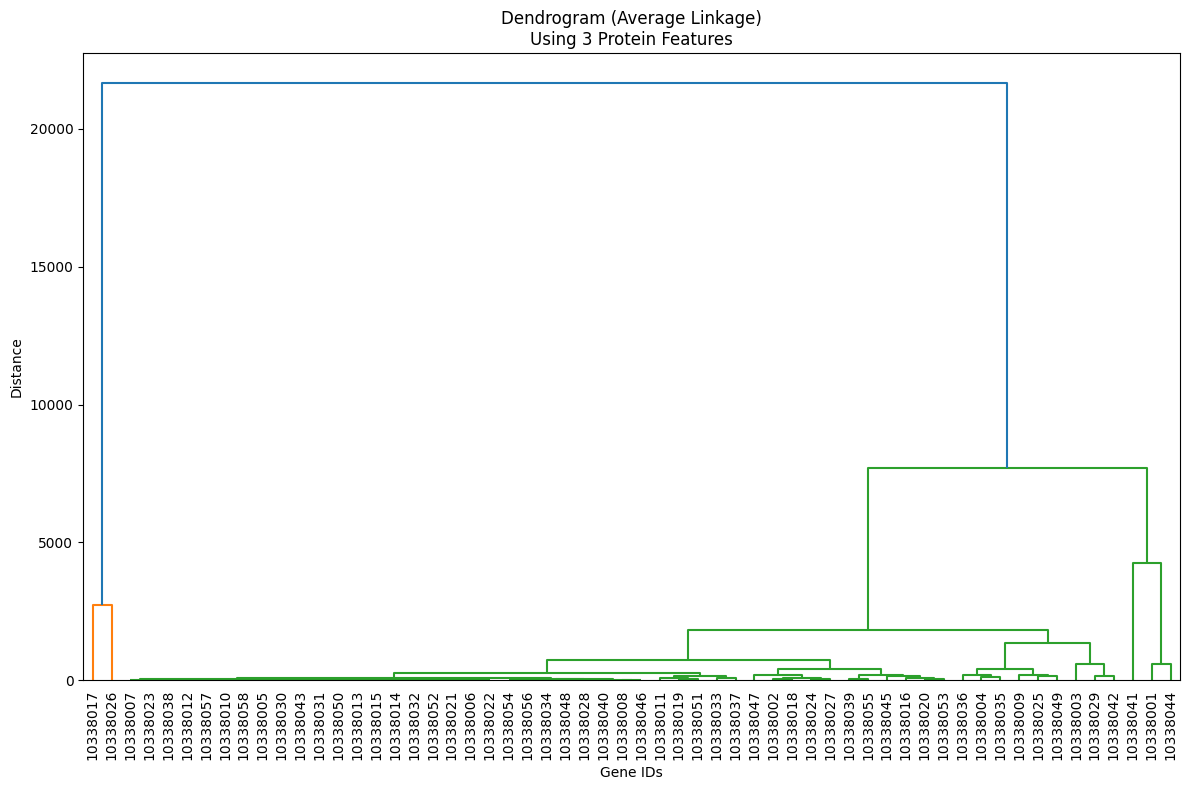

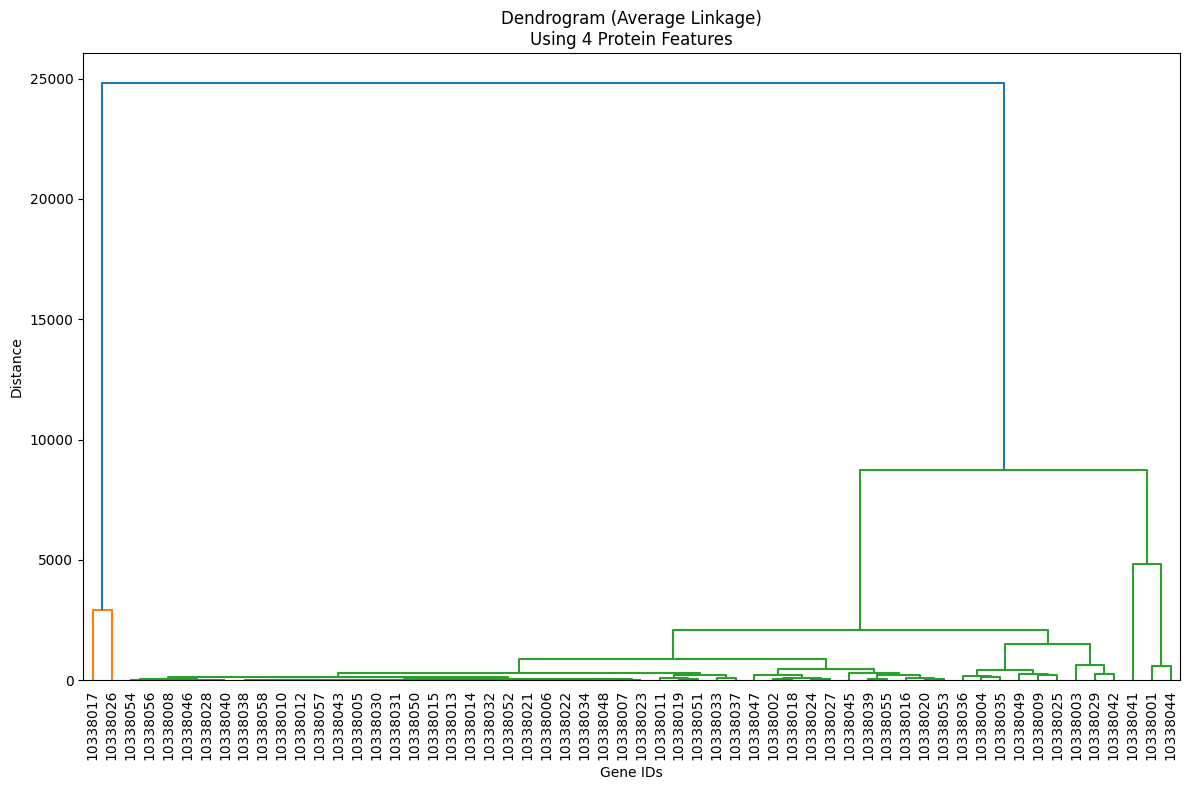

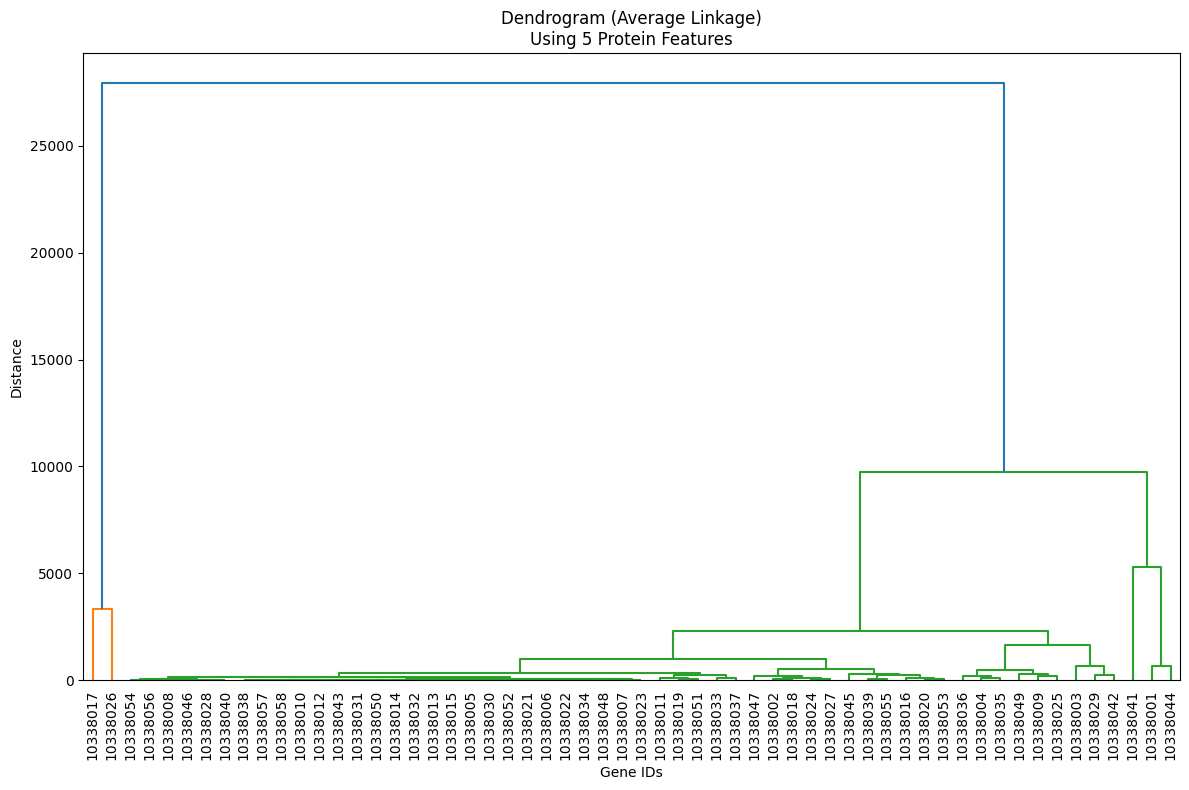

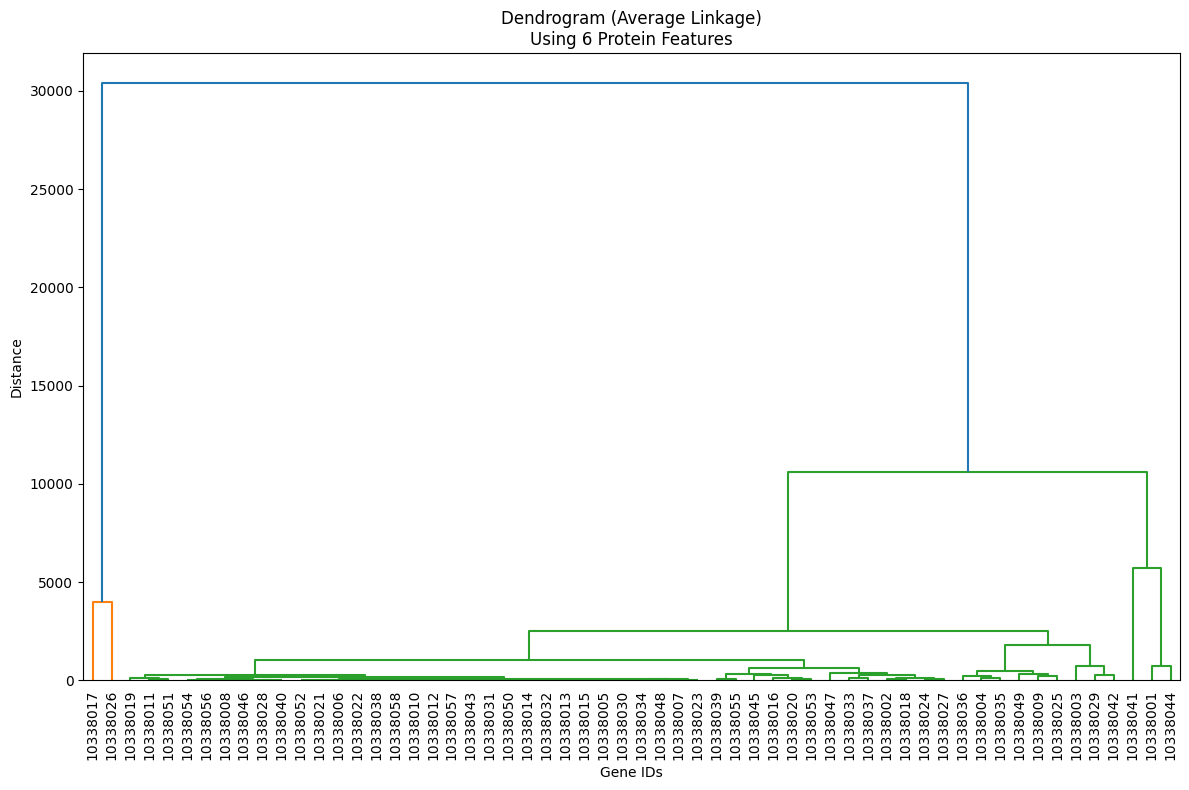

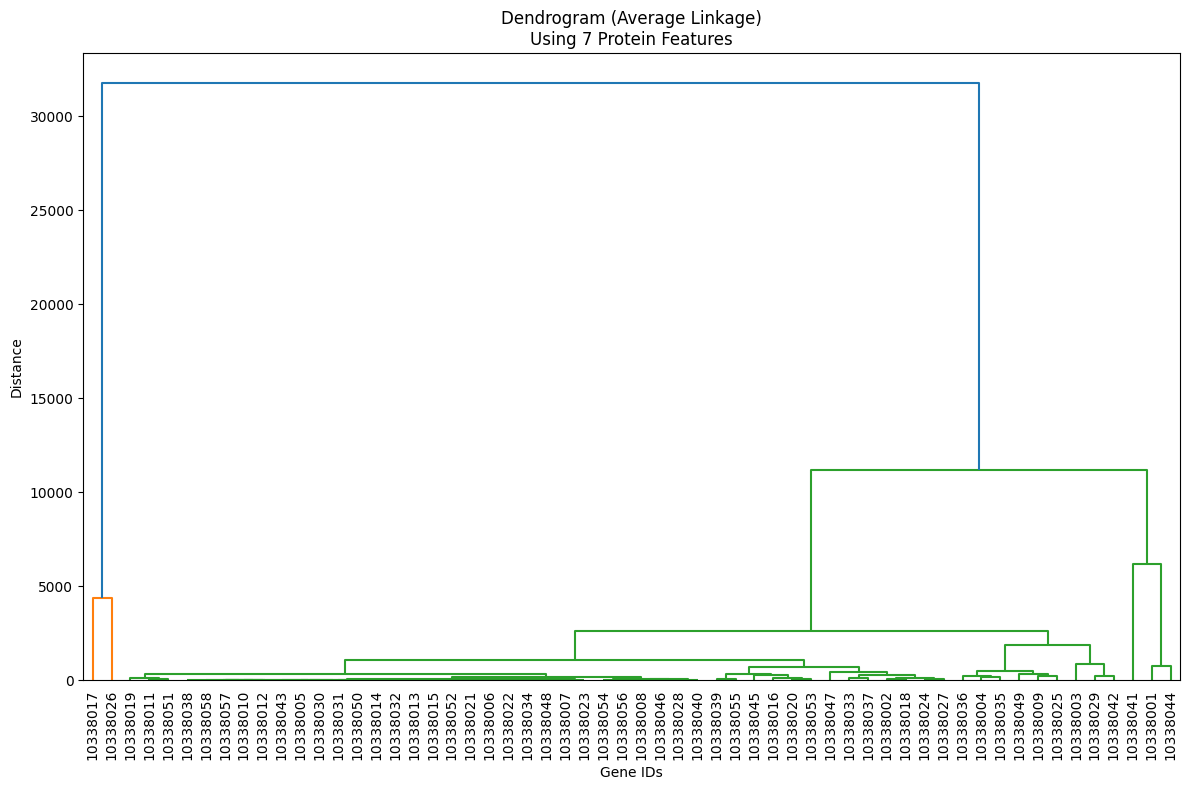

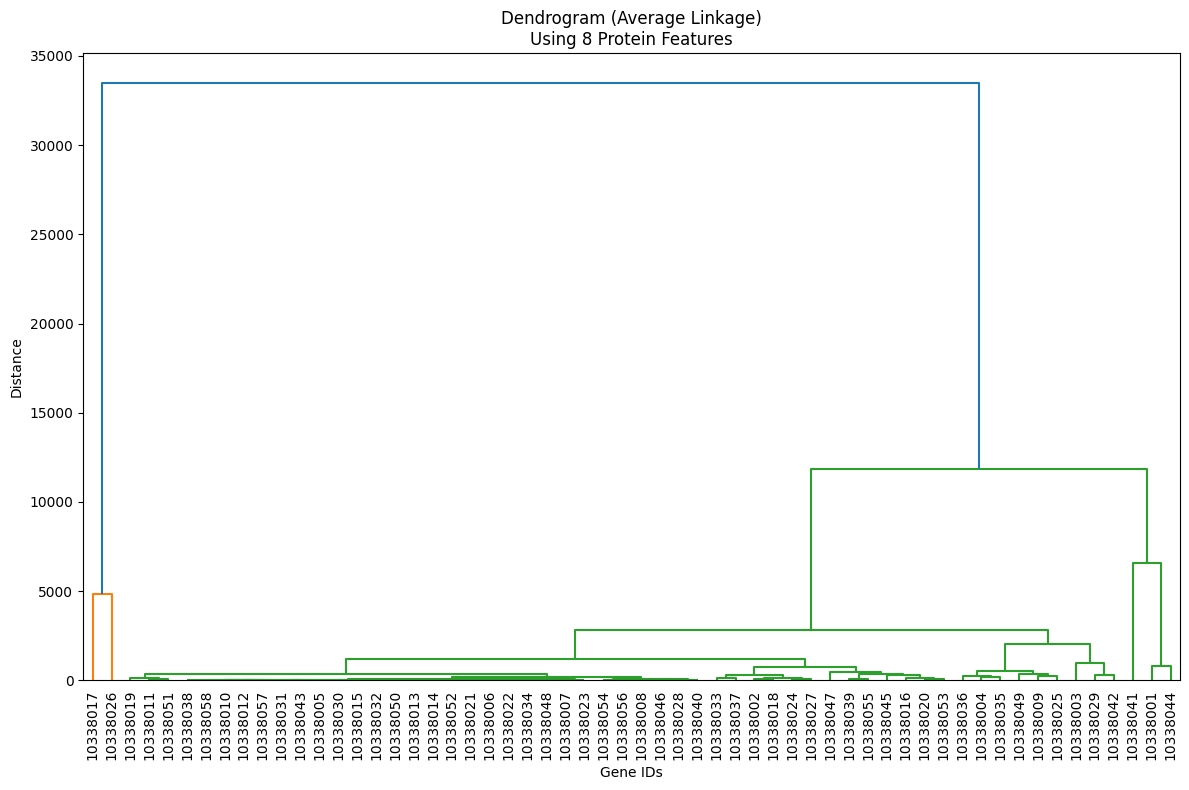

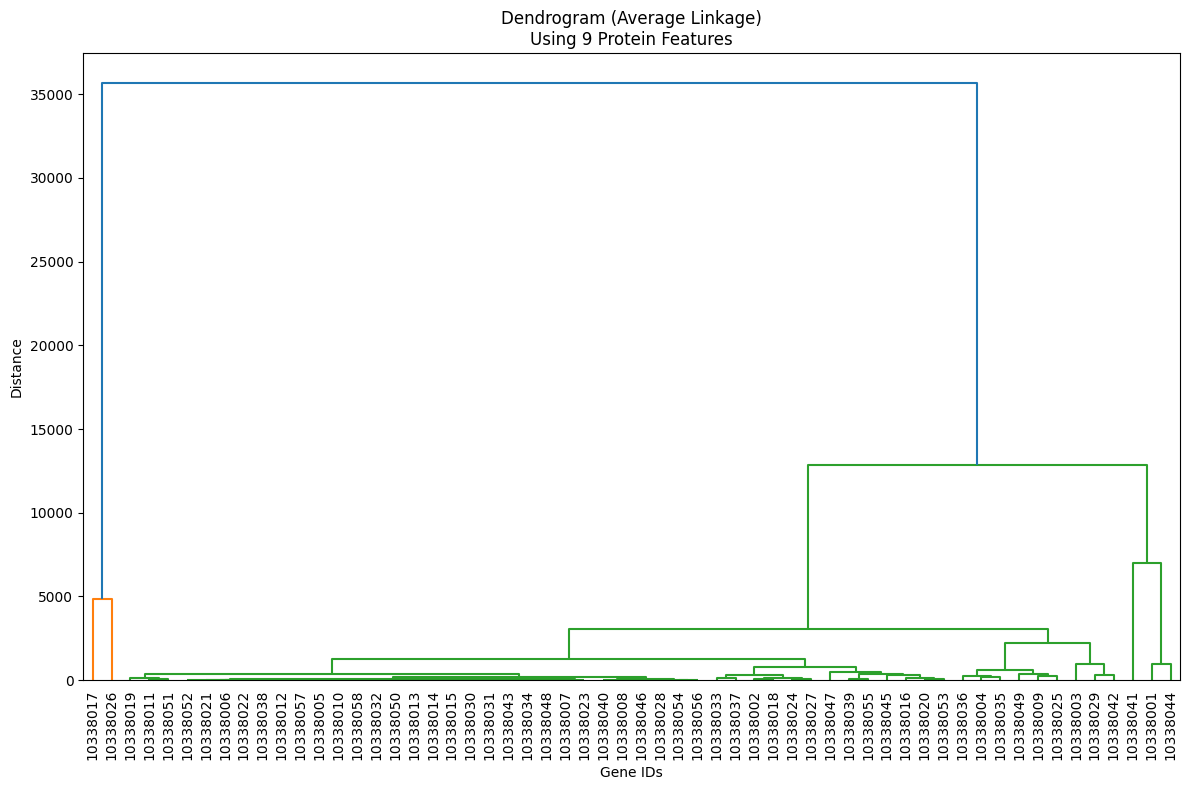

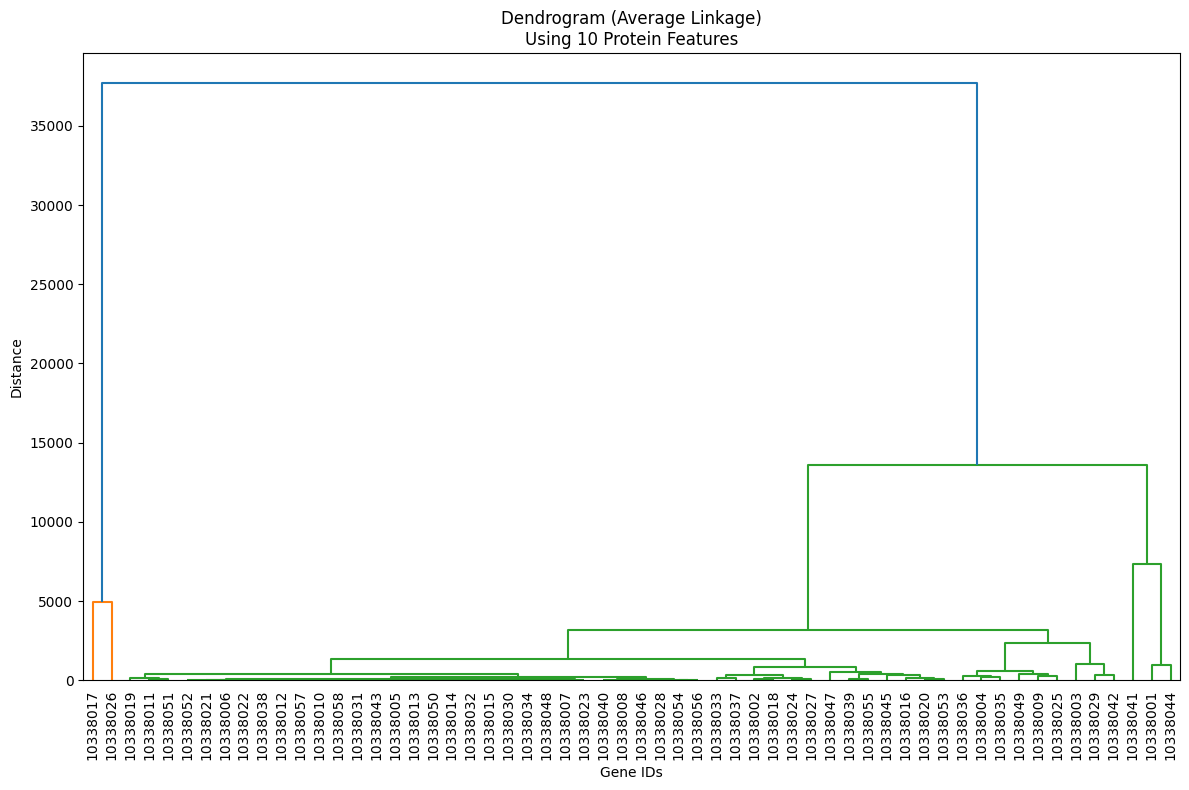

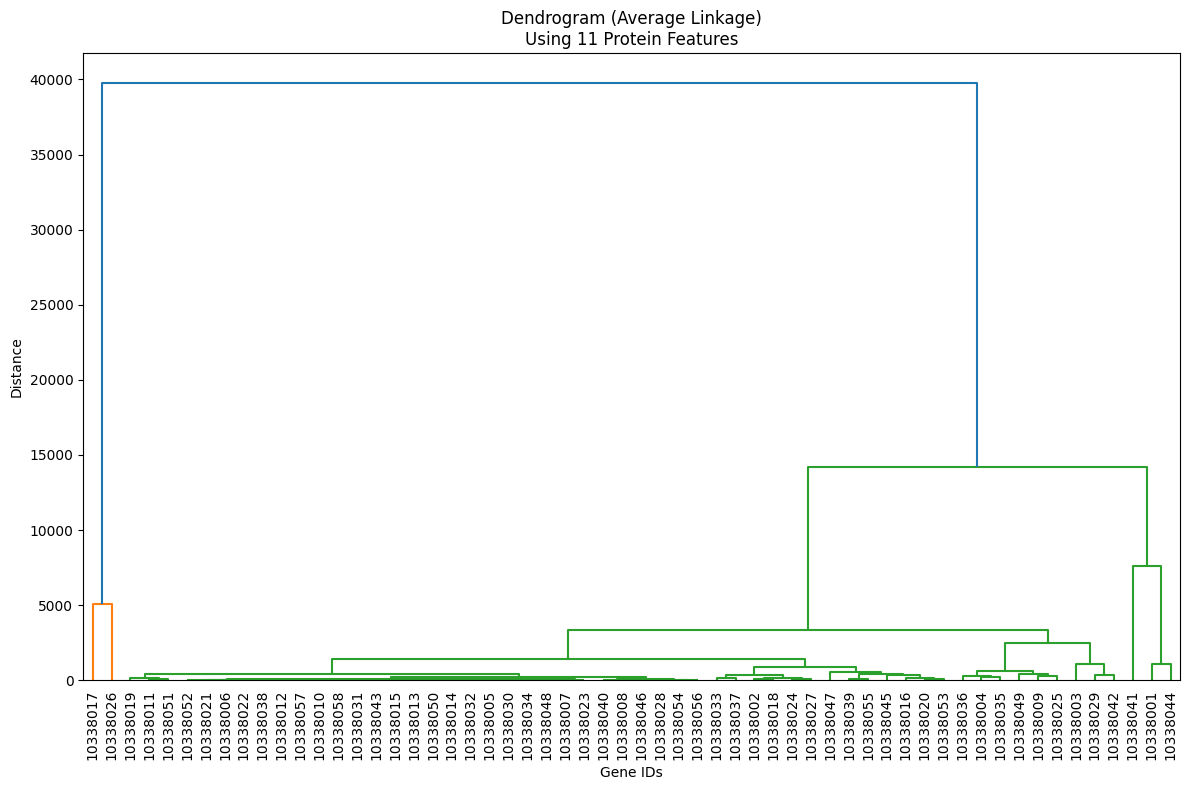

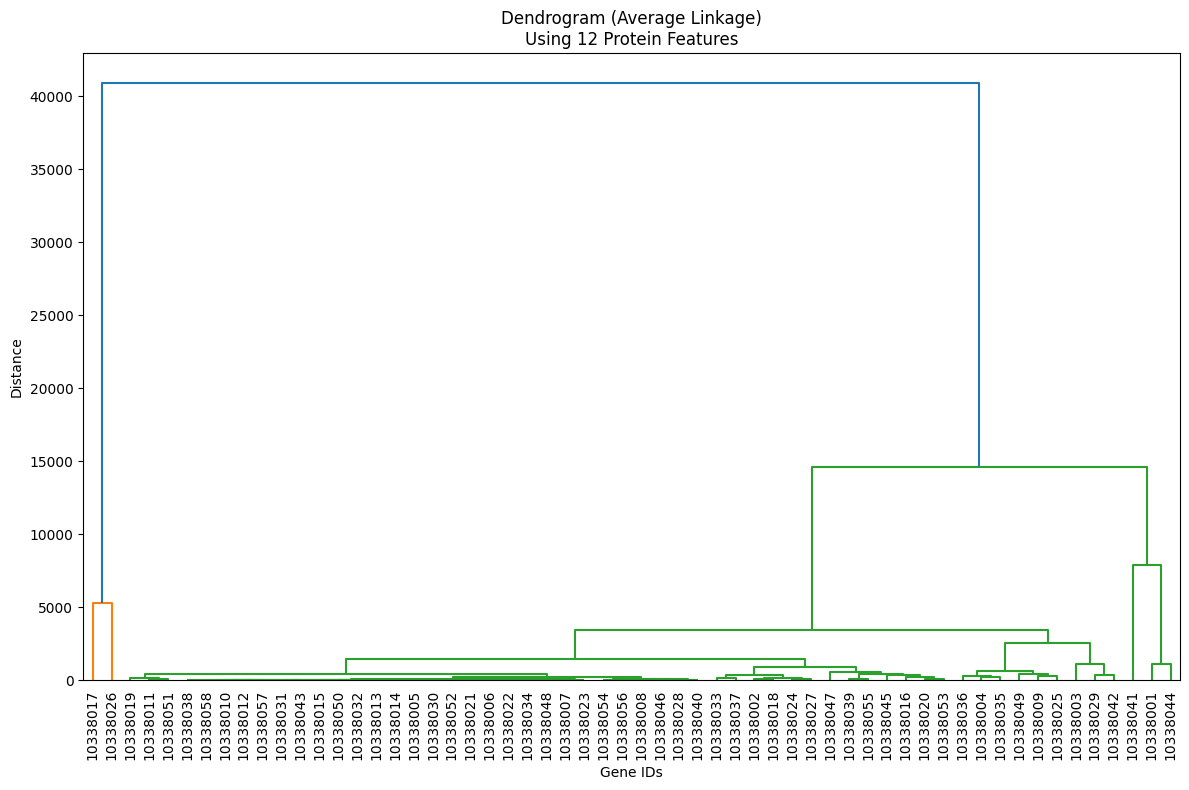

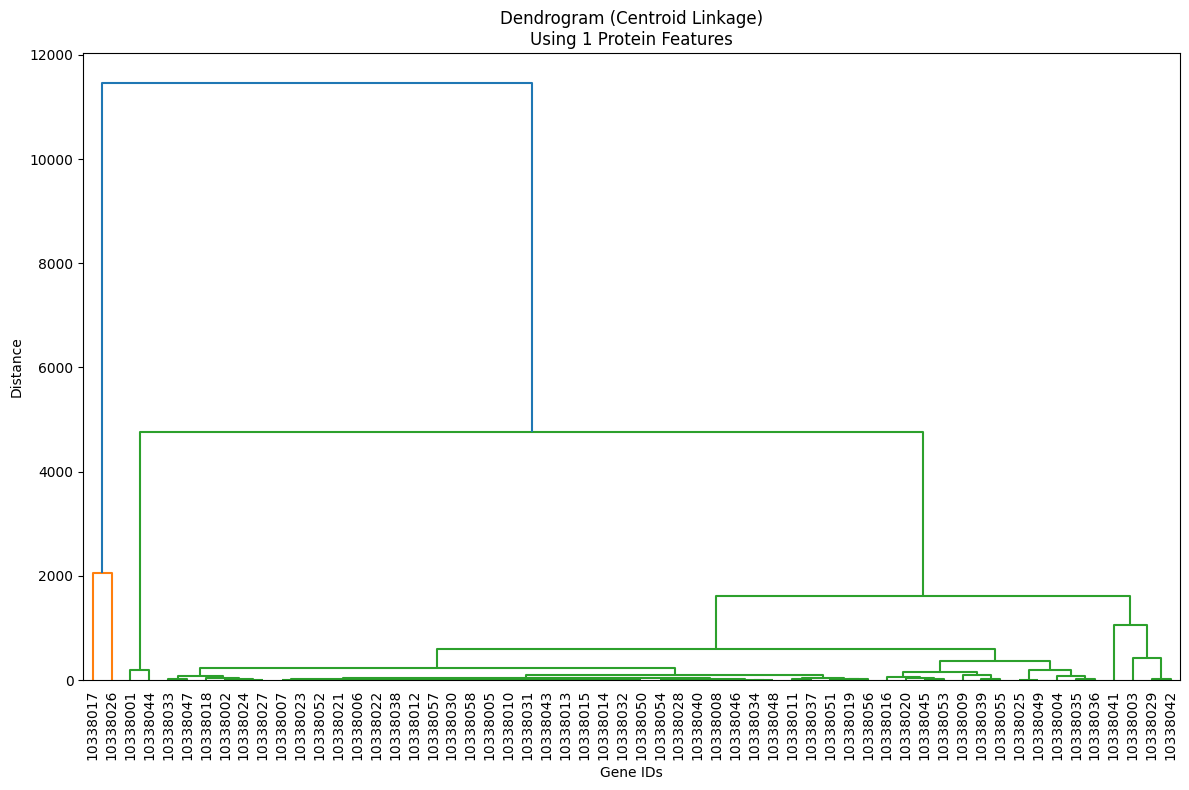

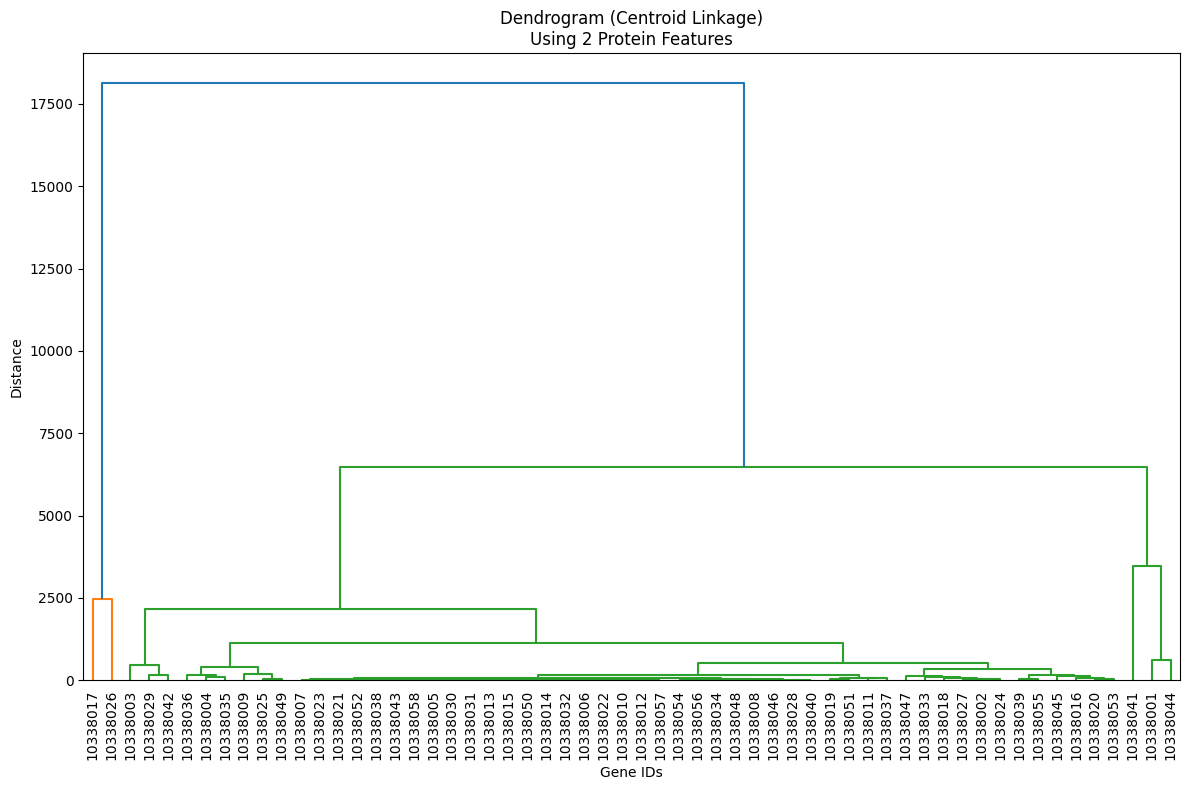

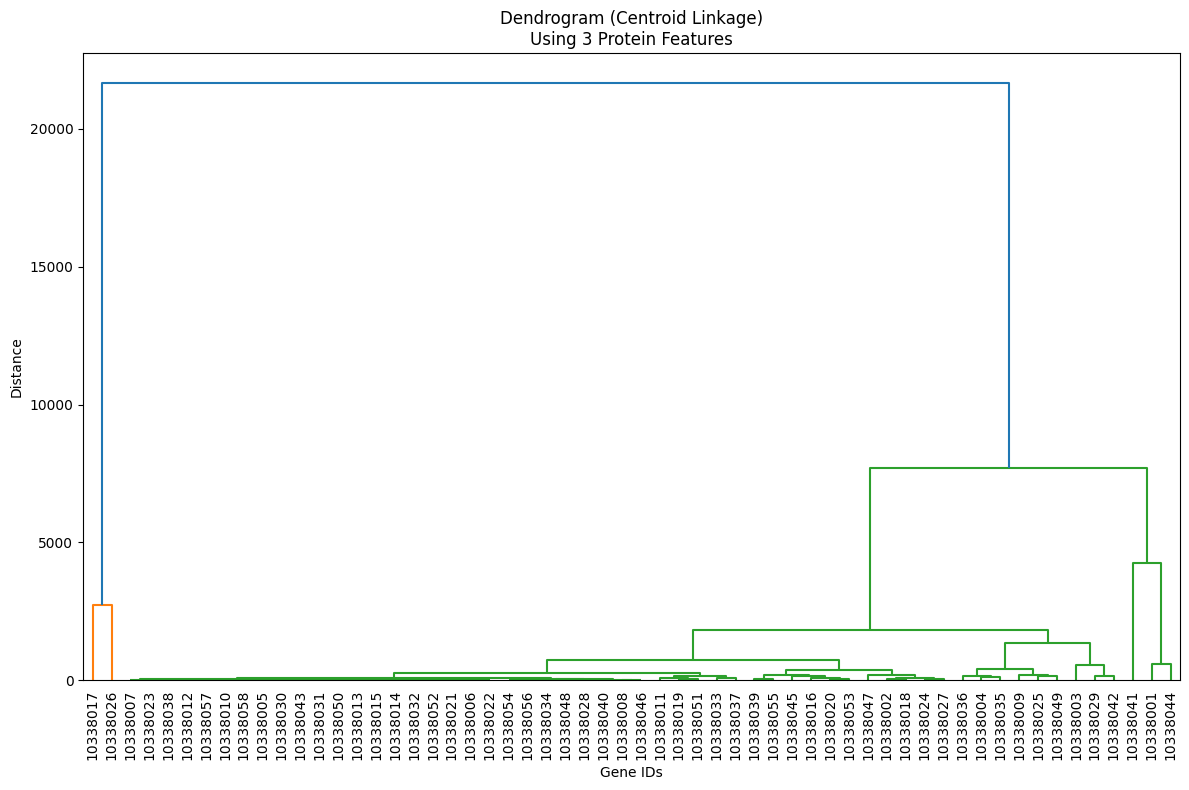

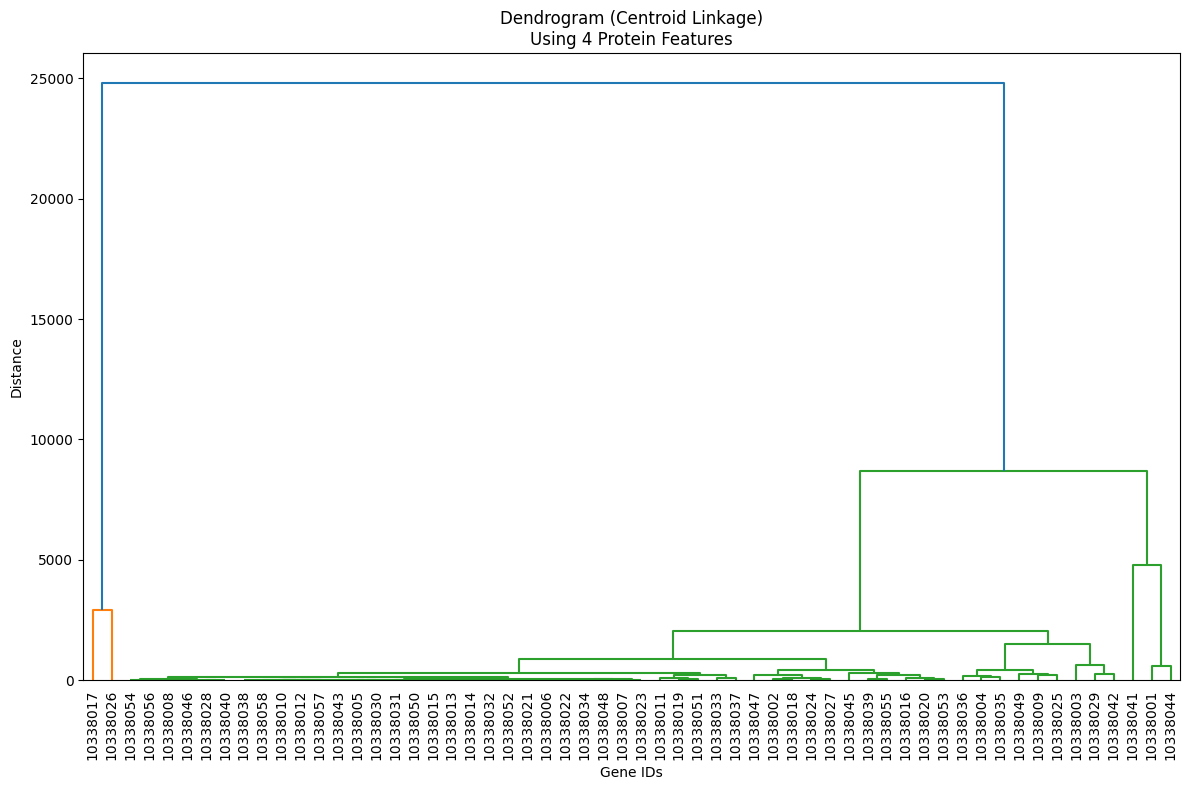

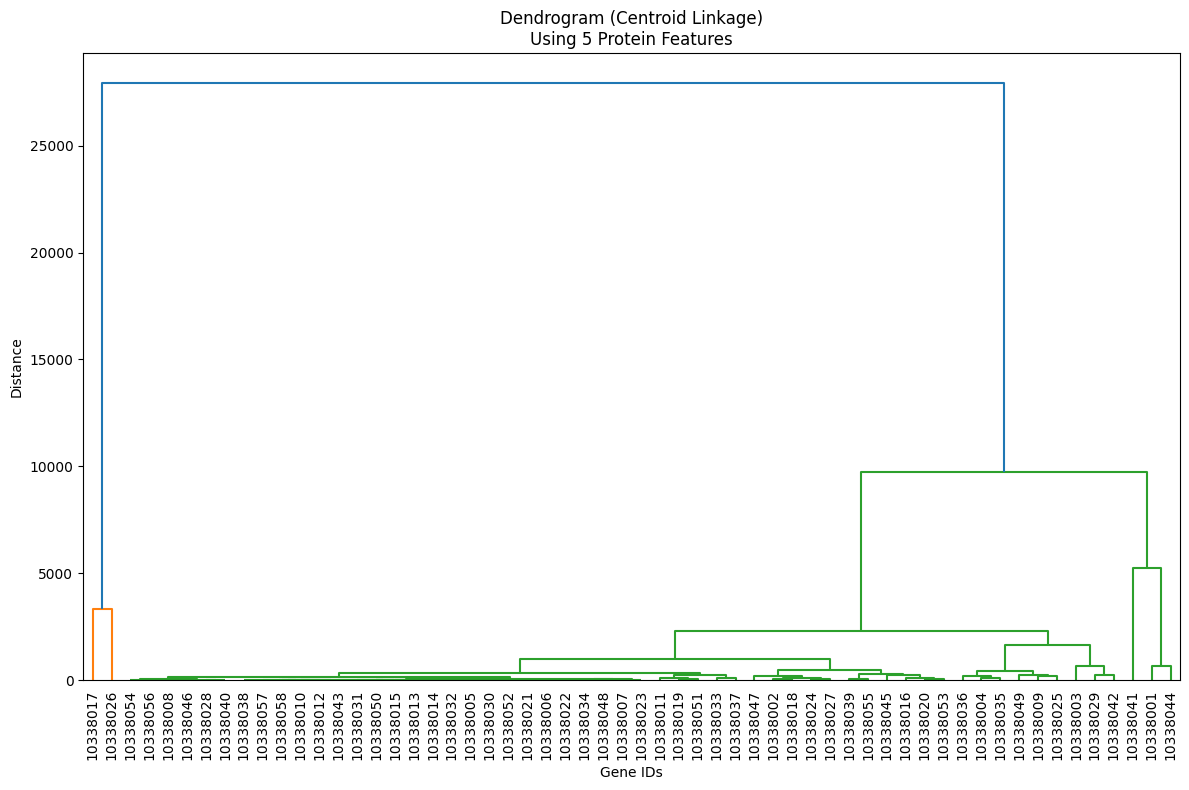

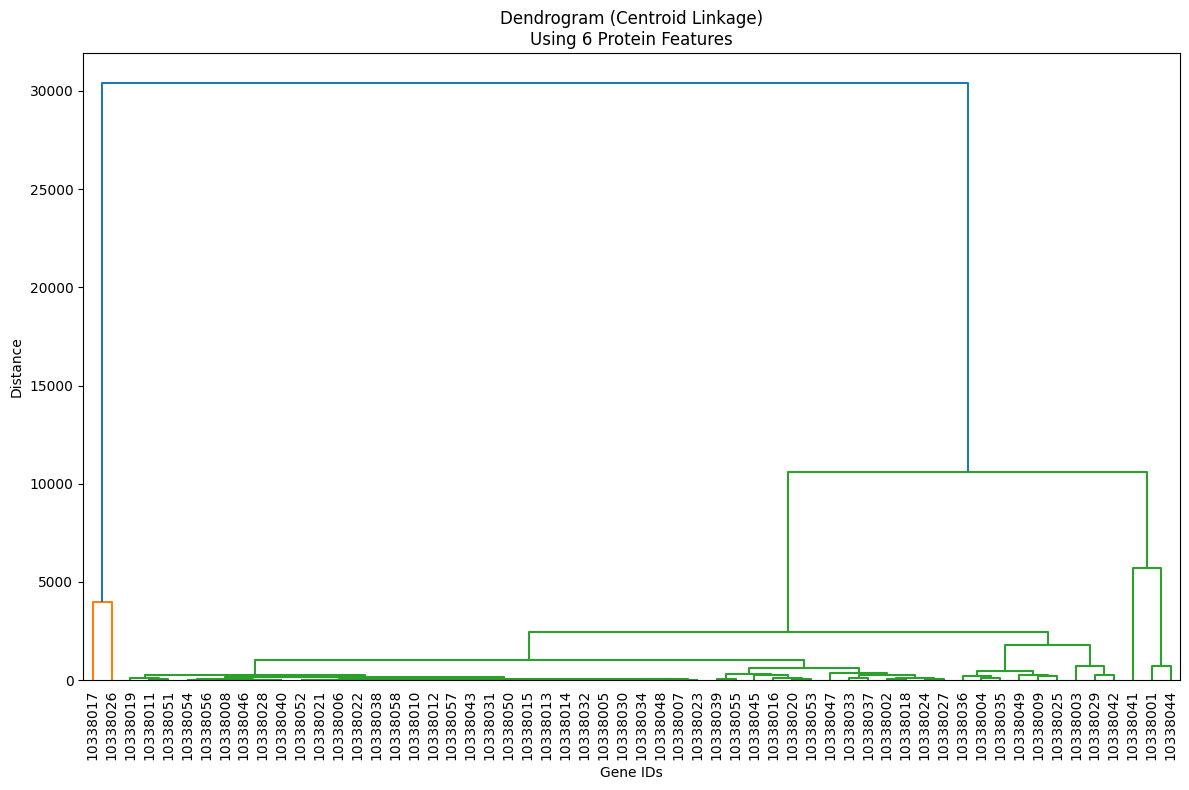

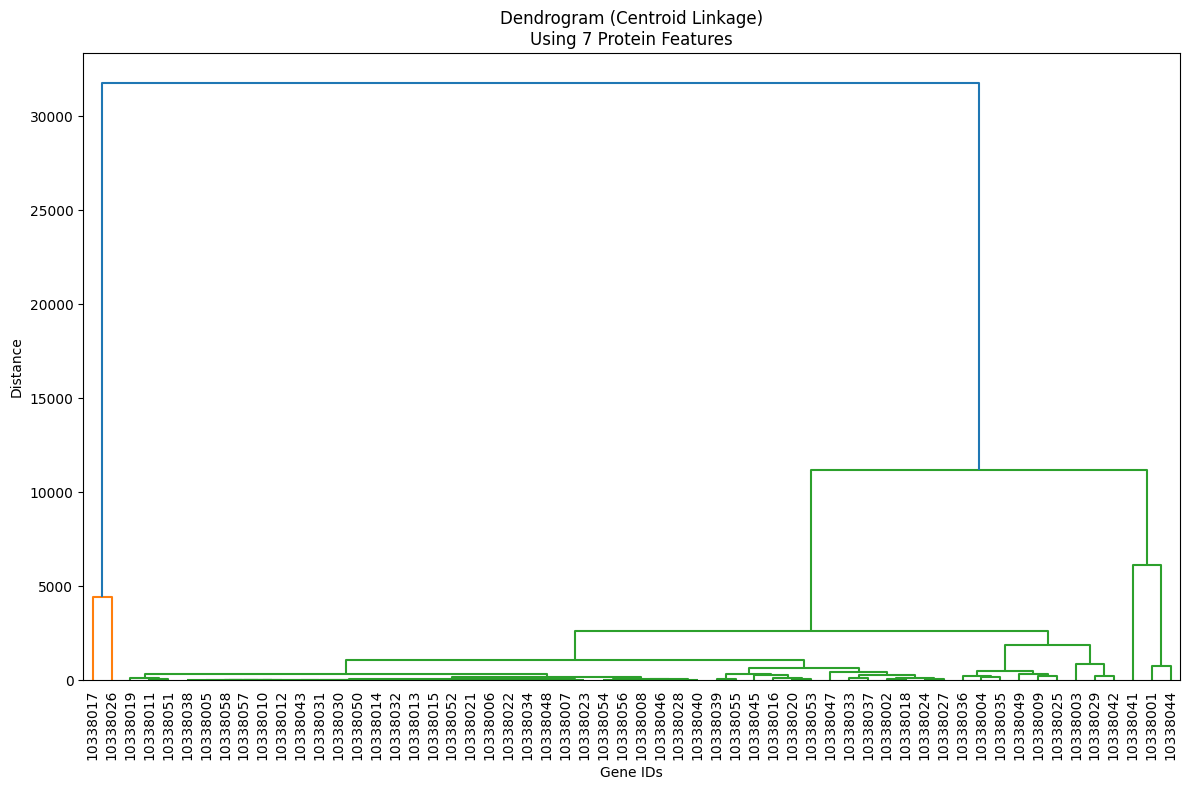

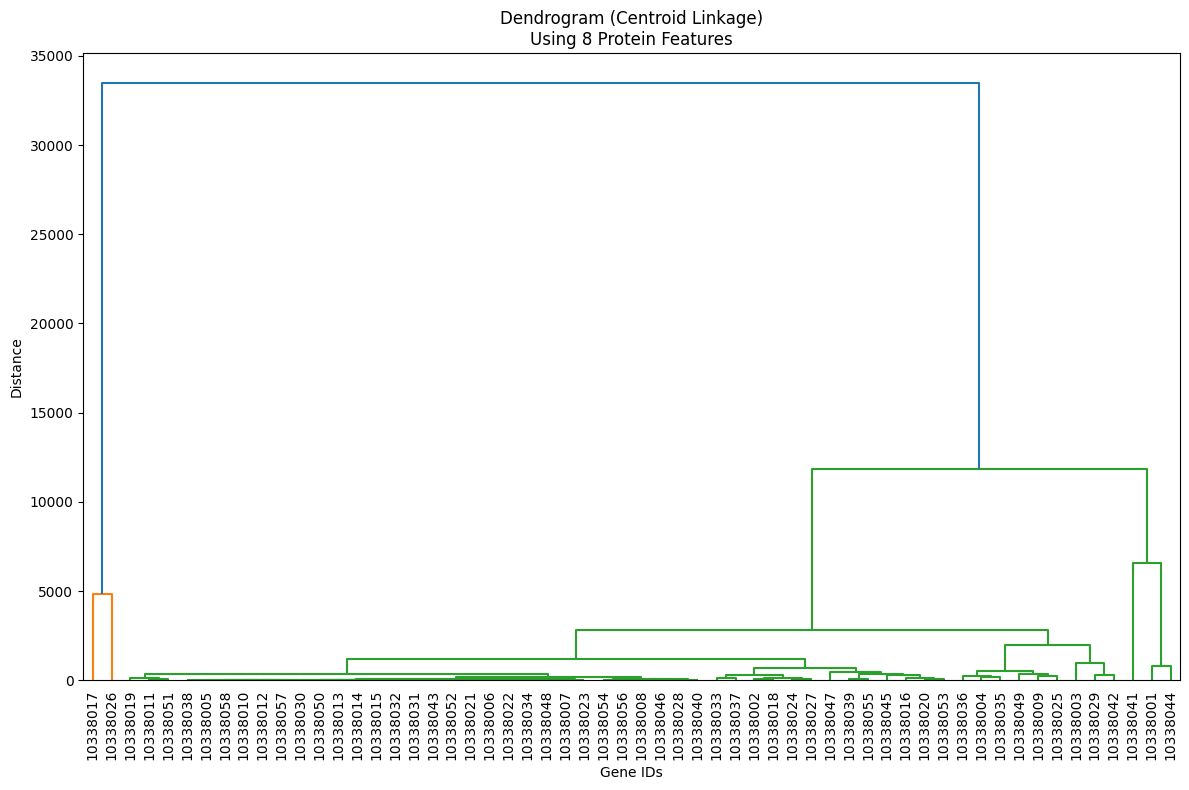

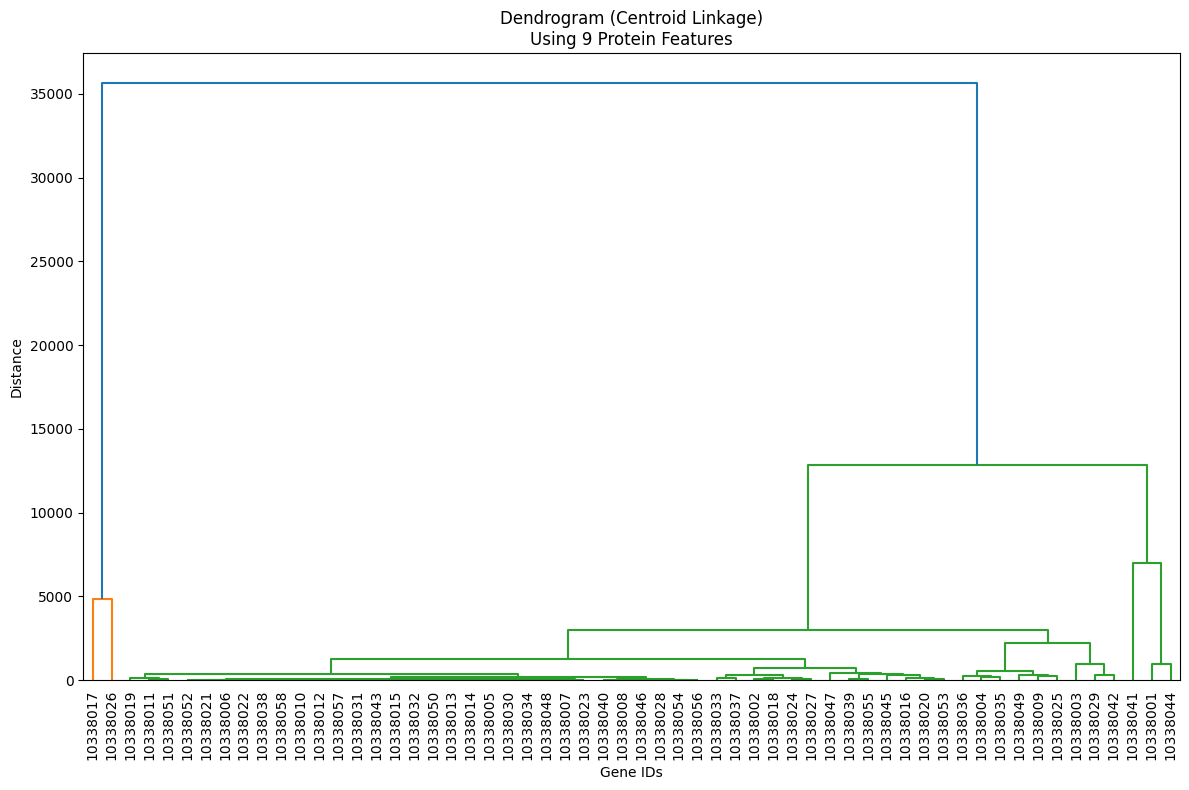

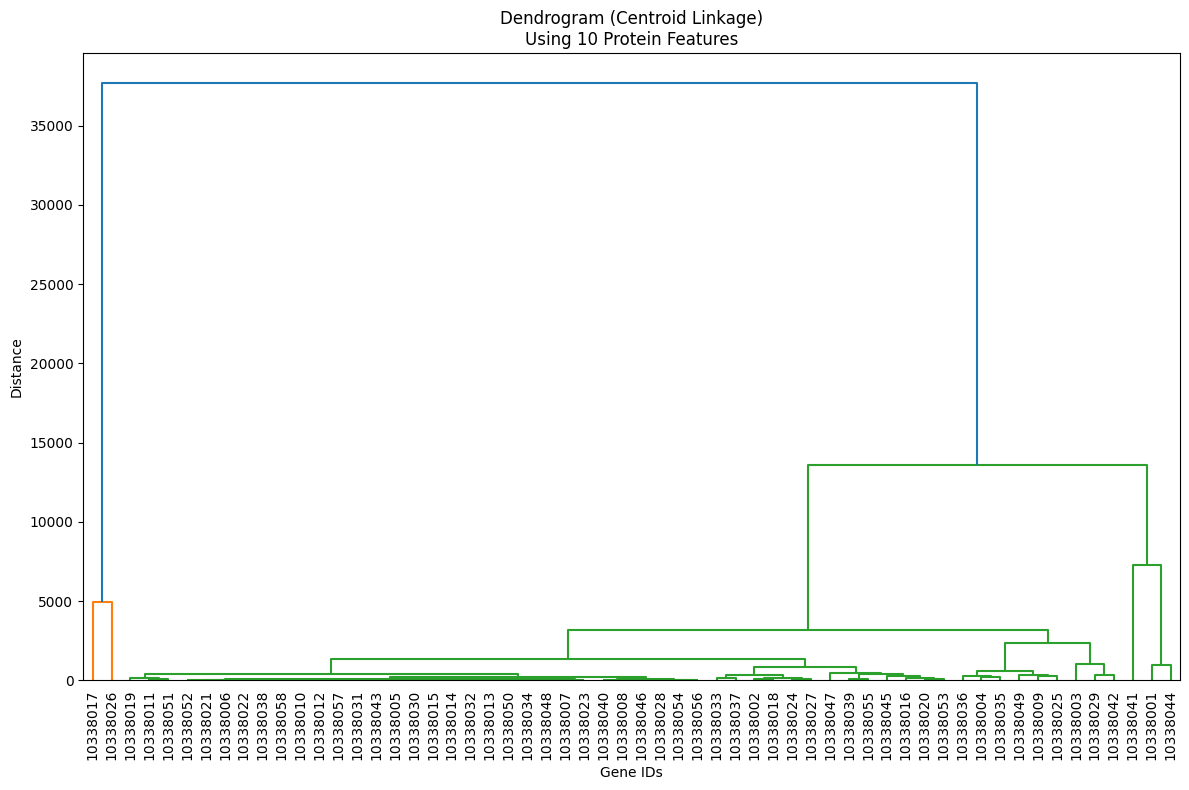

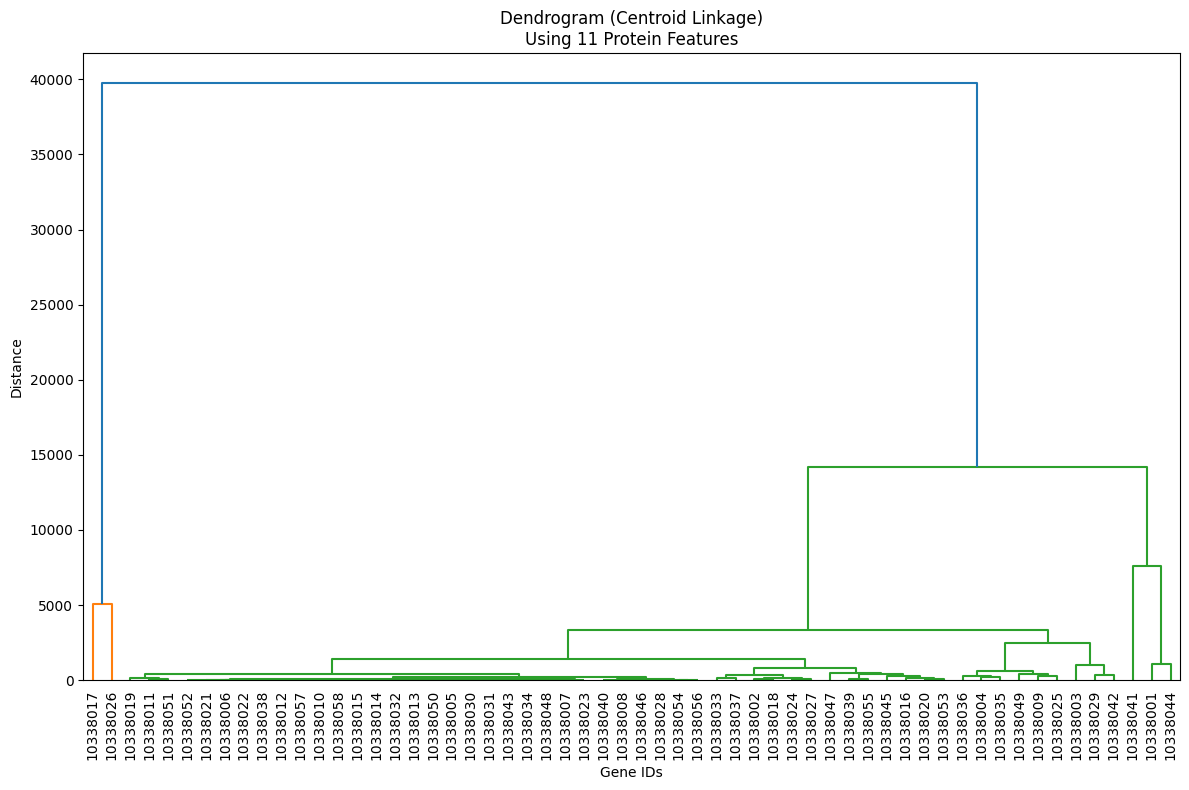

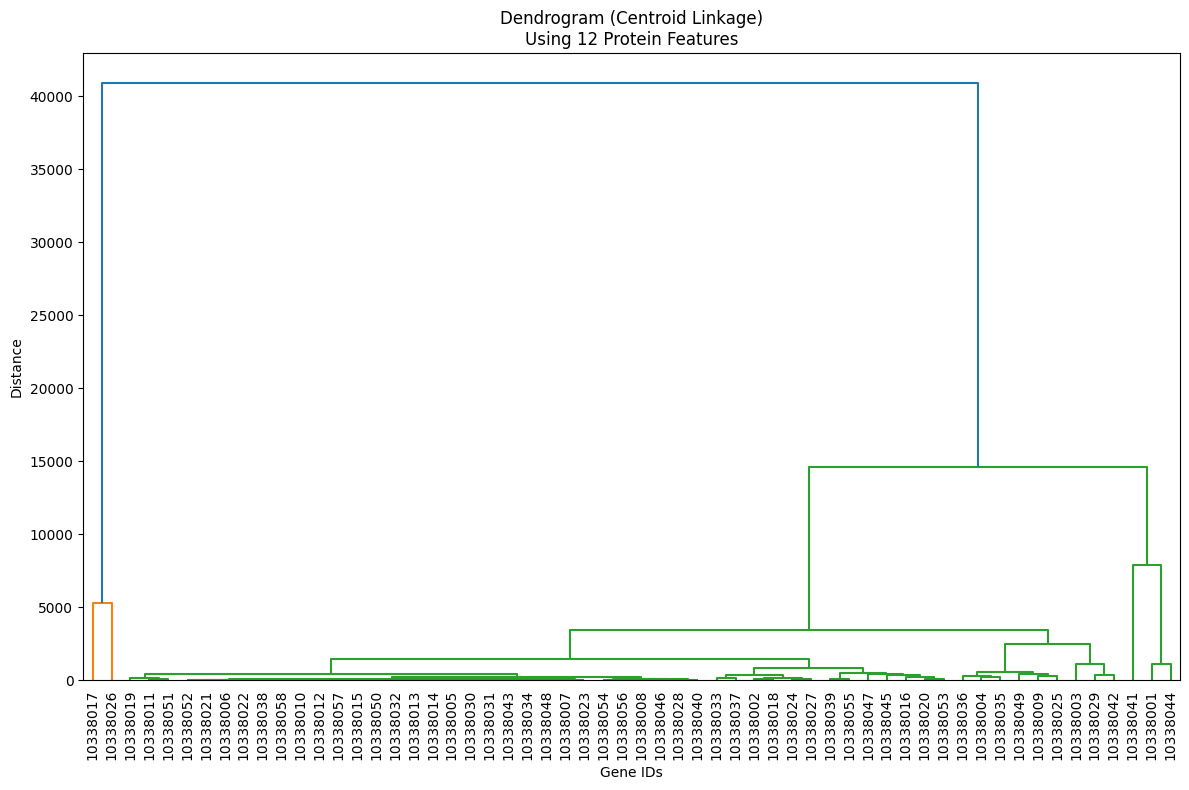

In [32]:
linkage_methods = ['single', 'complete', 'average', 'centroid']

# 12 specific protein features
protein_features = ['GSM613412', 'GSM613413', 'GSM613414', 'GSM613415', 'GSM613416', 'GSM613417', 'GSM613418', 'GSM613419', 'GSM613420', 'GSM613421', 'GSM613422', 'GSM613423']

# Loop through linkage methods
for method in linkage_methods:
    # Loop through different feature subsets
    for num_features in range(1, len(protein_features) + 1):
        # Extract the selected protein features
        selected_features = gene_dataset[protein_features[:num_features]].values
        
        # Perform hierarchical clustering
        linkage_matrix = linkage(selected_features, method)
        
        # Plotting
        plt.figure(figsize=(12, 8))
        dendrogram(linkage_matrix, labels=gene_dataset['ID_REF'].tolist(), leaf_font_size=10, orientation='top')
        plt.title(f'Dendrogram ({method.capitalize()} Linkage)\nUsing {num_features} Protein Features')
        plt.xlabel('Gene IDs')
        plt.ylabel('Distance')
        plt.tight_layout()
        plt.show()
